<a href="https://colab.research.google.com/github/VVKate/Neural_University_HomeWorks/blob/main/4_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: Июльский курс (2020). Pro. Занятие 4
# Обработка текстов с помощью нейросетей
## Верхошинская Катерина Викторовна

## **LIGHT**

### **Вариант 1**
**Задание:**
Выполните задания, по каждому варианту напишите точность распознавания на проверочной выборке и сделайте выводы. (тексты писателей)
1. Запустите нейронку c bag of words (01) при разных maxWordsCount
  * 100
  * 1000
  * 10000
  * 50000

2. Запустите нейронку c bag of words (01) при maxWordsCount = 20000 и разных архитектурах
  * Поменяйте количество нейронов в слоях
  * Поменяйте количество слоев
  * Поменяйте активационные функции слоев

3. Запустите нейронку c Embbedding при maxWordsCount = 50000, поменяйте размер Embedding пространства
  * 10
  * 50
  * 200


In [ ]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time

**Загрузка данных**


In [ ]:
!rm -R /content/texts # Проверяем наличие папки texts. Если есть, удаляем ее

In [ ]:
# Указываем путь к базе в Google Drive, создаем папку texts и извлекаем туда базу
!unzip -q '/content/drive/My Drive/Colab Notebooks/Базы/Тексты писателей.zip' -d /content/texts 

In [ ]:
def readText(fileName): # Объявляем функции для чтения файла. На вход отправляем путь к файлу
  f = open(fileName, 'r')        # Задаем открытие нужного файла в режиме чтения
  text = f.read()                # Читаем текст
  text = text.replace("\n", " ") # Переносы строки переводим в пробелы
  
  return text                    # Возвращаем текст файла

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"] # Объявляем интересующие нас классы
nClasses = len(className) # Считаем количество классов


#Загружаем обучающие тексты

trainText = [] #Формируем обучающие тексты
testText = [] #Формируем тестовые тексты

#Формирование необходимо произвести следующим образом 
#Класс каждого i-ого эллемента в обучающей выборке должен соответствовать 
#классу каждого i-ого эллемента в тестовой выборке

for i in className: #Проходим по каждому классу
  for j in os.listdir('texts/'): #Проходим по каждому файлу в папке с текстами #
    if i in j: #Проверяем, содержит ли файл j в названии имя класса i
      
      if 'Обучающая' in j: #Если в имени найденного класса есть строка "Обучающая" 
        trainText.append(readText('texts/' + j)) #добавляем в обучающую выборку
        print(j, 'добавлен в обучающую выборку') #Выводим информацию
      if 'Тестовая' in j: #Если в имени найденного класса есть строка "Тестовая"
        testText.append(readText('texts/' + j)) #добавляем в обучающую выборку
        print(j, 'добавлен в тестовую выборку') #Выводим информацию
  print()

(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку

(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку
(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку



In [ ]:
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
def createSetsMultiClasses(wordIndexes, xLen, step): # Функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из 6 классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # Задаем количество классов выборки
  classesXSamples = []        # Здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна (например, 6 по 1341*1000)"
  for wI in wordIndexes:      # Для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # Добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  # Формируем один общий xSamples
  xSamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна (например, 15779*1000)"
  ySamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): # В диапазоне кол-ва классов(6)
    xT = classesXSamples[t] # Берем очередной текст вида "кол-во окон в тексте*длину окна"(например, 1341*1000)
    for i in range(len(xT)): # И каждое его окно
      xSamples.append(xT[i]) # Добавляем в общий список выборки
      ySamples.append(utils.to_categorical(t, nClasses)) # Добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) # Переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # Переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #Функция возвращает выборку и соответствующие векторы классов

In [ ]:
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
def getSetFromIndexes(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна
  xSample = [] # Объявляем переменную для векторов
  wordsLen = len(wordIndexes) # Считаем количество слов
  index = 0 # Задаем начальный индекс 

  while (index + xLen <= wordsLen):# Идём по всей длине вектора индексов
    xSample.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
    index += step # Смещаеммся вперёд на step
    
  return xSample

In [ ]:
# Представляем тестовую выборку в удобных для распознавания размерах
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #Задаем количество классов
  xTest6Classes01 = []               #Здесь будет список из всех классов, каждый размером "кол-во окон в тексте * 20000 (при maxWordsCount=20000)"
  xTest6Classes = []                 #Здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #Для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #Тестовая выборка размером "кол-во окон*длину окна"(например, 420*1000)
    xTest6Classes.append(sample)              # Добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #Трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #И добавляется к нашему списку, 
  xTest6Classes = np.array(xTest6Classes)                     #И добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000


In [ ]:
# Распознаём тестовую выборку и выводим результаты
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  totalSumRec = 0 # Сумма всех правильных ответов
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)

    evVal = []
    for j in range(nClasses):
      evVal.append(len(currOut[currOut==j])/len(xTest[i]))

    totalSumRec += len(currOut[currOut==i])
    recognizedClass = np.argmax(evVal) #Определяем, какой класс в итоге за какой был распознан
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "Это НЕПРАВИЛЬНЫЙ ответ!"
    if (recognizedClass == i):
      isRecognized = "Это ПРАВИЛЬНЫЙ ответ!"
    str1 = 'Класс: ' + className[i] + " " * (11 - len(className[i])) + str(int(100*evVal[i])) + "% сеть отнесла к классу " + className[recognizedClass]
    print(str1, " " * (55-len(str1)), isRecognized, sep='')
  
  #Выводим средний процент распознавания по всем классам вместе
  print()
  sumCount = 0
  for i in range(nClasses):
    sumCount += len(xTest[i])
  print("Средний процент распознавания ", int(100*totalSumRec/sumCount), "%", sep='')

  print()
  
  return totalSumRec/sumCount

#### **1) Запустите нейронку c bag of words (01) при разных maxWordsCount**


In [ ]:
data1 = []
data1

[]

***************************************
Исследование для maxWordsCount =  100
***************************************
Время обработки: 2.16c
Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумме  11553605  символов,  1769573  слов 


Статистика по тестовым текстам:
О. Генри    349662 символов,  53238 слов
Стругацкие  704846 символов,  108621 слов
Булгаков    875042 символов,  132730 слов
Саймак      318811 символов,  50360 слов
Фрай        1278191 символов,  196731 слов
Брэдберри   868673 символов,  132524 слов
----
В сумме  4395225  символов,  674204  слов
Размер xTrain: (17640, 1000)
Размер yTrain: (17640, 6)
Размер xTest: (6686, 1000)
Размер yTest: (6686, 6)
Время на формирование обучающей и тестовой выборки: 2.17c
Время на преобразовани

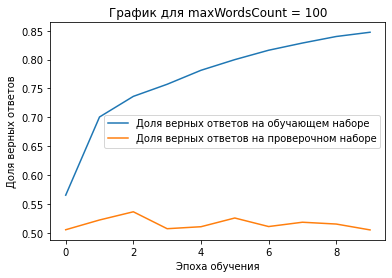

НЕЙРОНКА:  Тексты BOW + Dense для maxWordsCount = 100

Класс: О. Генри   48% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 37% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   52% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     42% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       77% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  22% сеть отнесла к классу Стругацкие Это НЕПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 50%

***************************************
Исследование для maxWordsCount =  1000
***************************************
Время обработки: 2.22c
Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумме

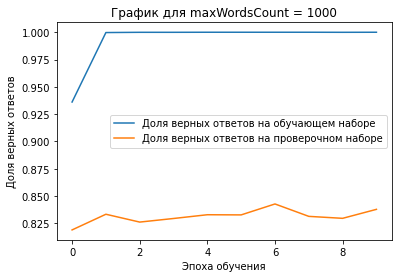

НЕЙРОНКА:  Тексты BOW + Dense для maxWordsCount = 1000

Класс: О. Генри   92% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 82% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   81% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     71% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       87% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  83% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 83%

***************************************
Исследование для maxWordsCount =  10000
***************************************
Время обработки: 2.3c
Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумме 

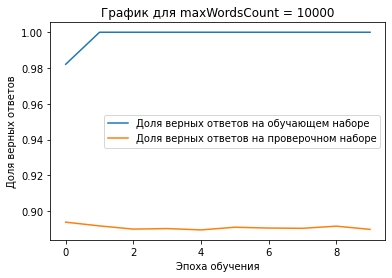

НЕЙРОНКА:  Тексты BOW + Dense для maxWordsCount = 10000

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 88% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   78% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     80% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%

***************************************
Исследование для maxWordsCount =  28000
***************************************
Время обработки: 2.25c
Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумм

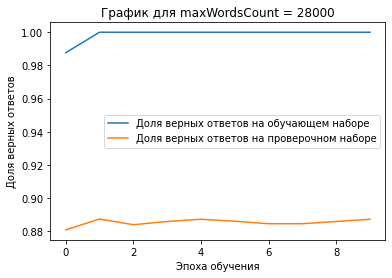

НЕЙРОНКА:  Тексты BOW + Dense для maxWordsCount = 28000

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 86% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   80% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     80% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  95% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%



In [ ]:
# При попытке запустить сеть с параметром maxWordsCount = 50 000 Колаб(ОЗУ) упал,
# Постепенным уменьшением размера maxWordsCount, было найдено максимальное значение maxWordsCount,
# которое может выдержать Колаб и не упасть. 
    
MAX = [100, 1000, 10000, 28000] # размер maxWordsCount
for m in MAX:
 print("***************************************")
 print("Исследование для maxWordsCount = ", m)
 print("***************************************") 
 cur_time = time.time() # Засекаем текущее время
 maxWordsCount = m # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов

 # Воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
 tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)

 tokenizer.fit_on_texts(trainText) # "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
 items = list(tokenizer.word_index.items()) # Вытаскиваем индексы слов для просмотра
 print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')


 # Преобразовываем текст в последовательность индексов согласно частотному словарю
 trainWordIndexes = tokenizer.texts_to_sequences(trainText) # Обучающие тесты в индексы
 testWordIndexes = tokenizer.texts_to_sequences(testText)  # Проверочные тесты в индексы

 print("Статистика по обучающим текстам:")

 symbolsTrainText = 0 # Объявляем переменную для подсчета символов в обучающих текстах
 wordsTrainText = 0 # Объявляем переменную для подсчета слов в обучающих текстах

 for i in range(nClasses): # Проходим по всем классам
   print(className[i], " "*(10-len(className[i])), len(trainText[i]), "символов, ", len(trainWordIndexes[i]), "слов")
   symbolsTrainText += len(trainText[i]) # Считаем символы
   wordsTrainText += len(trainWordIndexes[i]) # Считаем слова 

 print('----')
 print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
 print()
 print("Статистика по тестовым текстам:")

 symbolsTestText = 0 # Объявляем переменную для подсчета символов в тестовых текстах
 wordsTestText = 0 # Объявляем переменную для подсчета слов в тестовых текстах

 for i in range(nClasses): #Проходим по всем классам
   print(className[i], ' '*(10-len(className[i])), len(testText[i]), "символов, ", len(testWordIndexes[i]), "слов")
   symbolsTestText += len(testText[i]) #Считаем символы
   wordsTestText += len(testWordIndexes[i]) #Считаем слова 
 print('----')
 print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

 #Задаём базовые параметры
 xLen = 1000 #Длина отрезка текста, по которой анализируем, в словах
 step = 100 #Шаг разбиения исходного текста на обучающие векторы

 cur_time = time.time() # Засекаем текущее время
 #Формируем обучающую и тестовую выборку
 xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
 xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
 print("Размер xTrain:", xTrain.shape)
 print("Размер yTrain:",yTrain.shape)
 print("Размер xTest:",xTest.shape)
 print("Размер yTest:",yTest.shape)
 #получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1
 print('Время на формирование обучающей и тестовой выборки: ', round(time.time() - cur_time, 2), 'c', sep='')

 cur_time = time.time() # Засекаем текущее время
 # Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
 xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist()) #П одаем xTrain в виде списка, чтобы метод успешно сработал
 xTest01 = tokenizer.sequences_to_matrix(xTest.tolist()) # Подаем xTest в виде списка, чтобы метод успешно сработал
 print('Время на преобразование полученных выборки(BOW): ', round(time.time() - cur_time, 2), 'c', sep='')

 model01 = Sequential()
 #Первый полносвязный слой
 model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
 #Слой регуляризации Dropout
 model01.add(Dropout(0.25))
 #Слой пакетной нормализации
 model01.add(BatchNormalization())
 #Выходной полносвязный слой
 model01.add(Dense(6, activation='softmax'))

 model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

 #Обучаем сеть на выборке, сформированной по bag of words - xTrain01
 history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
 
 data1 = data1 + [[m, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]

 # визуализируем результаты
 plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
 plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
 plt.xlabel('Эпоха обучения')
 plt.ylabel('Доля верных ответов')
 title = "График для maxWordsCount = " + str(m)
 plt.title(title)
 plt.legend()
 plt.show()

 xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step) #Преобразование тестовой выборки
 #Проверяем точность нейронки обученной на bag of words
 text = "Тексты BOW + Dense для maxWordsCount = " + str(m)
 pred = recognizeMultiClass(model01, xTest6Classes01, text)  




In [ ]:
import pandas as pd # Подключаем библиотеку Pandas
df1 = pd.DataFrame(data1, columns=['maxWordsCount', 'val_accuracy'])
df1

,maxWordsCount,val_accuracy
0,100,0.505
1,1000,0.838
2,10000,0.890
3,28000,0.887


##### **Выводы:**
Самый главный вывод из проведенных эксперементов можно сделать такой, что для каждого текста, с разным набором слов(количеством, уникальностью и тд), maxWordsCount подбирается сугубо индивидуально. Для конкретно примера - самый лучший результат точности классификации показал размер maxWordsCount = 10 000.
А при 100 точность очень маленькая. 
Из опыта работы с чатом, с маленьким размером текста и словаря, лучший результат точности показал  maxWordsCount = 25, что опять же подтверждает то что все сугубо индивидуально подбирается.
Единственно что можно обобщить, это то что при большом размере словаря(больших текстах) лучше брать maxWordsCount побольше, а при маленьких текстах поменьше. Принцип соразмерности в деле! 




#### **2) Запустите нейронку c bag of words (01) при maxWordsCount = 20000 и разных архитектурах**

In [ ]:
data = []
data

[]

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
**************************************************************************************************************************
Время обработки: 2.29c
Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумме  11553605  символов,  1769573  слов 


Статистика по тестовым текстам:
О. Генри    349662 символов,  53238 слов
Стругацкие  704846 символов,  108621 слов
Булгаков    875042 символов,  132730 слов
Саймак      318811 символов, 

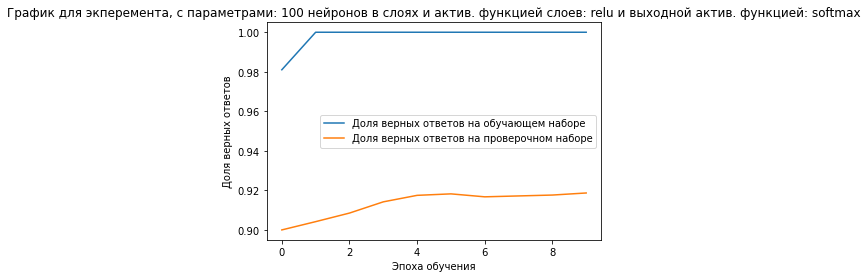

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   97% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 90% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   86% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     89% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 91%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
***************************************************************

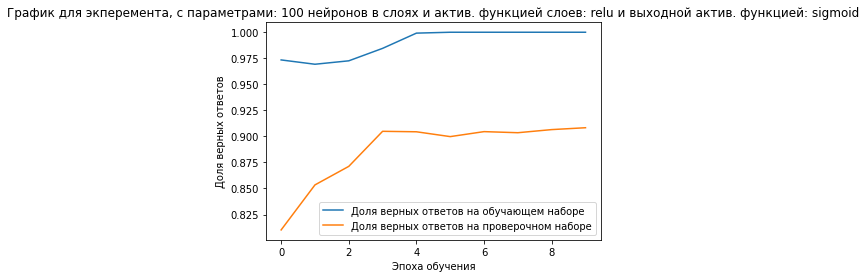

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   88% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 87% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   83% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     92% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       92% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
*************************************************************

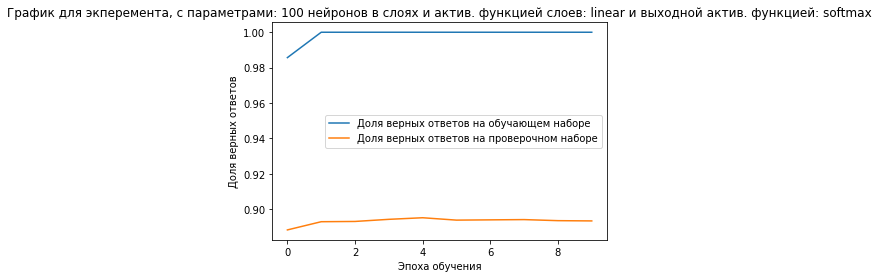

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 88% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   84% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     77% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       87% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
***********************************************************

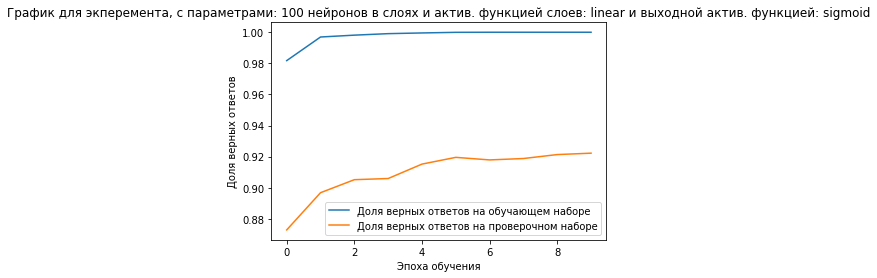

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   97% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 86% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   93% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     83% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 92%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
*************************************************************

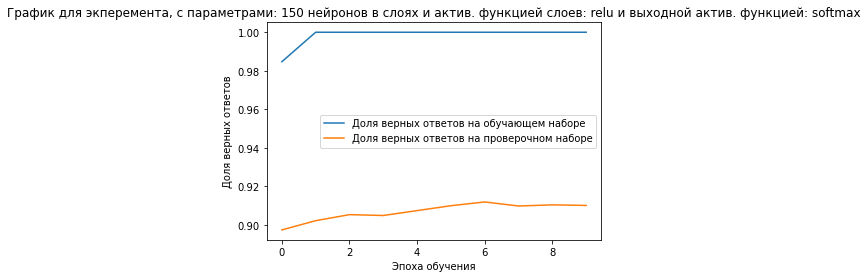

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   96% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 92% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   85% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     82% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 91%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
***************************************************************

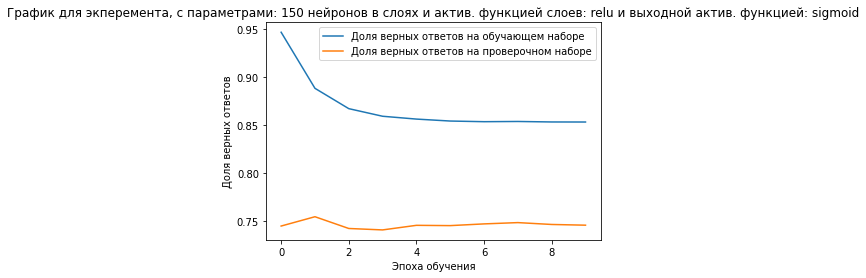

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   92% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 88% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   0% сеть отнесла к классу О. Генри    Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Саймак     92% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 74%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
***********************************************************

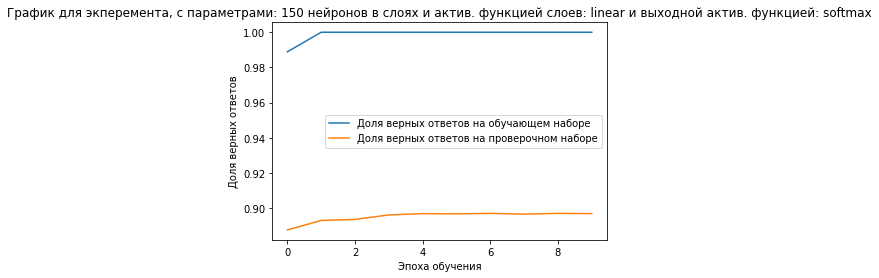

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   93% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 91% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   82% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     87% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       86% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
***********************************************************

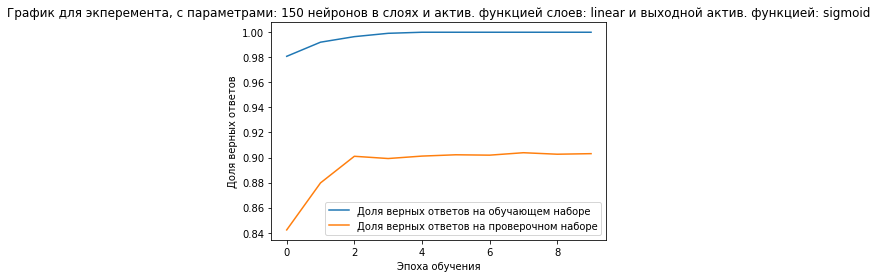

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   96% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 91% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   87% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     88% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       85% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
*************************************************************

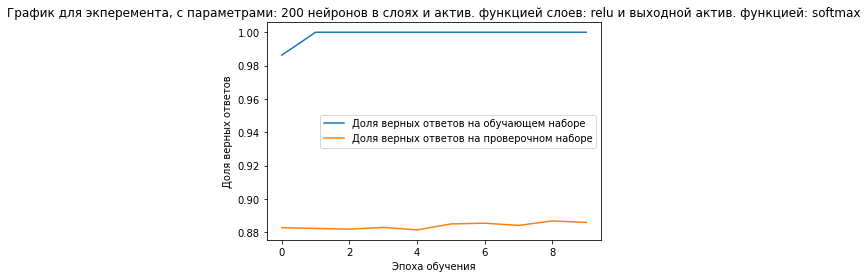

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   93% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 87% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   77% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
***************************************************************

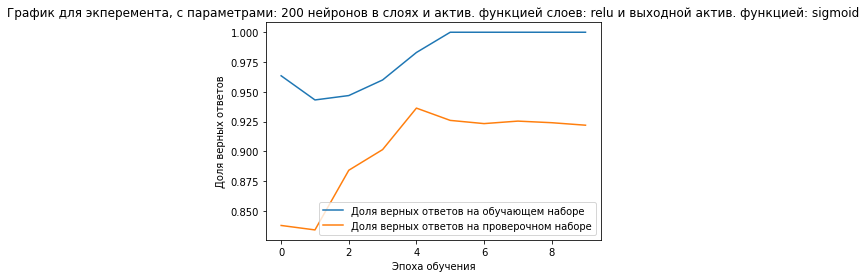

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   93% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 87% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   89% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     91% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       93% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 92%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
*************************************************************

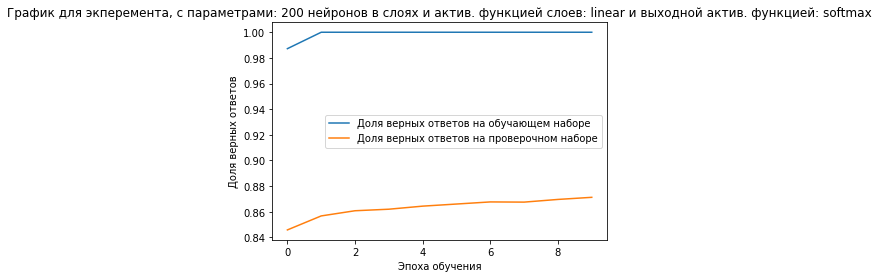

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 86% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   72% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     80% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 87%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
***********************************************************

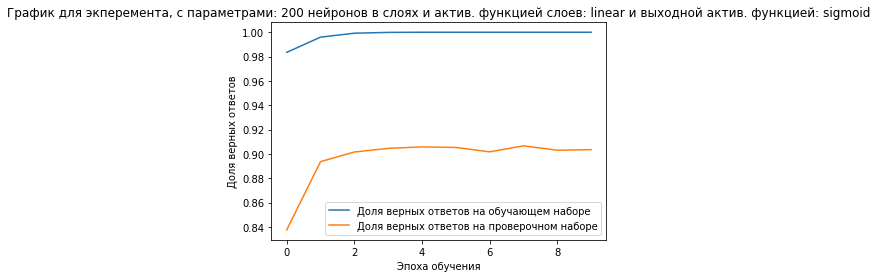

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   96% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 89% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   85% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     86% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       87% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
*************************************************************

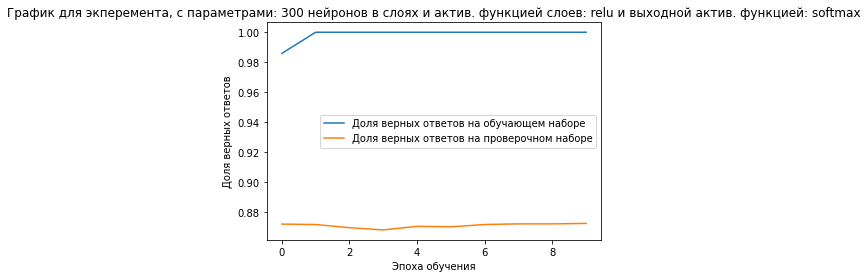

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   93% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 82% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   77% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     77% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 87%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
***************************************************************

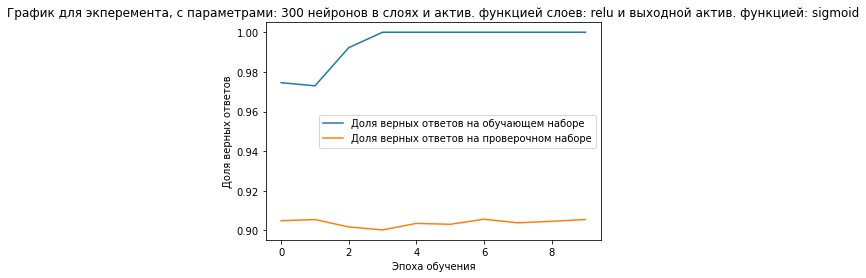

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   93% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 87% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   89% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     76% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
*************************************************************

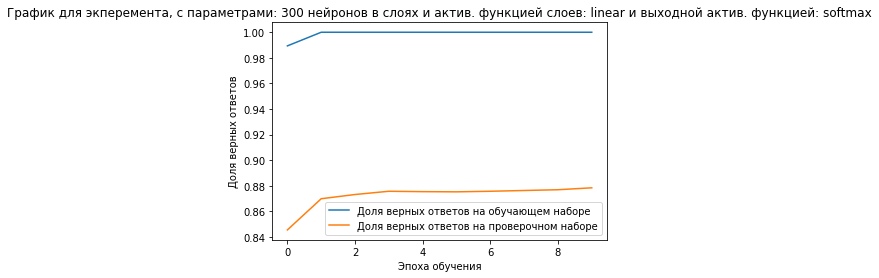

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 86% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   76% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 87%

**************************************************************************************************************************
Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
***********************************************************

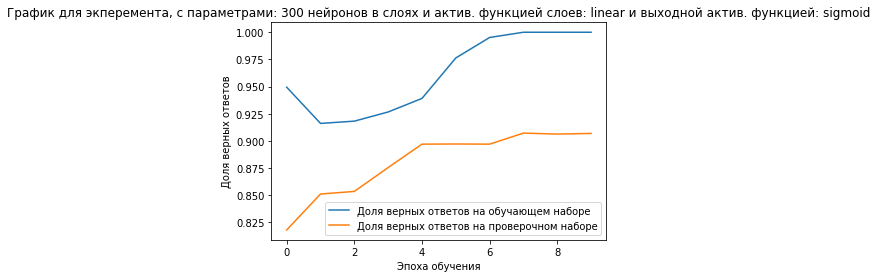

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   74% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 91% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   92% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     94% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       87% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%



In [ ]:
# 1) 1 Dense слой, 1 Dropout, 1 BatchNormalization, выходной слой - Dense

maxWordsCount = 20000   # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов

N = [100, 150, 200, 300]  # количество нейронов в слоях 
A = ['relu', 'linear']
A_EXIT = ['softmax', 'sigmoid']
for n in N:
    flag = True
    for a in A:
        flag = True
        for a_exit in A_EXIT:
            flag = True
            print("**************************************************************************************************************************")
            print("Исследование для 1 Dense слоя, 1 Dropout, 1 BatchNormalization, выходной слой - Dense")
            print("С параметрами: {} нейронов в слоях, активационной функцией слоев: {}  и выходной активационной функцией: {}".format(n, a, a_exit))
            print("**************************************************************************************************************************")
            cur_time = time.time()  # Засекаем текущее время
            
            # Воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
            tokenizer = Tokenizer(num_words=maxWordsCount,
                                  filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ',
                                  oov_token='unknown', char_level=False)

            tokenizer.fit_on_texts(
                trainText)  # "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
            items = list(tokenizer.word_index.items())  # Вытаскиваем индексы слов для просмотра
            print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

            # Преобразовываем текст в последовательность индексов согласно частотному словарю
            trainWordIndexes = tokenizer.texts_to_sequences(trainText)  # Обучающие тесты в индексы
            testWordIndexes = tokenizer.texts_to_sequences(testText)  # Проверочные тесты в индексы

            print("Статистика по обучающим текстам:")

            symbolsTrainText = 0  # Объявляем переменную для подсчета символов в обучающих текстах
            wordsTrainText = 0  # Объявляем переменную для подсчета слов в обучающих текстах

            for i in range(nClasses):  # Проходим по всем классам
                print(className[i], " " * (10 - len(className[i])), len(trainText[i]), "символов, ",
                      len(trainWordIndexes[i]), "слов")
                symbolsTrainText += len(trainText[i])  # Считаем символы
                wordsTrainText += len(trainWordIndexes[i])  # Считаем слова 

            print('----')
            print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
            print()
            print("Статистика по тестовым текстам:")

            symbolsTestText = 0  # Объявляем переменную для подсчета символов в тестовых текстах
            wordsTestText = 0  # Объявляем переменную для подсчета слов в тестовых текстах

            for i in range(nClasses):  # Проходим по всем классам
                print(className[i], ' ' * (10 - len(className[i])), len(testText[i]), "символов, ",
                      len(testWordIndexes[i]), "слов")
                symbolsTestText += len(testText[i])  # Считаем символы
                wordsTestText += len(testWordIndexes[i])  # Считаем слова 
            print('----')
            print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

            # Задаём базовые параметры
            xLen = 1000  # Длина отрезка текста, по которой анализируем, в словах
            step = 100  # Шаг разбиения исходного текста на обучающие векторы

            cur_time = time.time()  # Засекаем текущее время
            # Формируем обучающую и тестовую выборку
            xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)  # извлекаем обучающую выборку
            xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)  # извлекаем тестовую выборку
            print("Размер xTrain:", xTrain.shape)
            print("Размер yTrain:", yTrain.shape)
            print("Размер xTest:", xTest.shape)
            print("Размер yTest:", yTest.shape)
            # получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1
            print('Время на формирование обучающей и тестовой выборки: ', round(time.time() - cur_time, 2), 'c', sep='')

            cur_time = time.time()  # Засекаем текущее время
            # Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
            xTrain01 = tokenizer.sequences_to_matrix(
                xTrain.tolist())  # П одаем xTrain в виде списка, чтобы метод успешно сработал
            xTest01 = tokenizer.sequences_to_matrix(
                xTest.tolist())  # Подаем xTest в виде списка, чтобы метод успешно сработал
            print('Время на преобразование полученных выборки(BOW): ', round(time.time() - cur_time, 2), 'c', sep='')

            model01 = Sequential()

            # Первый полносвязный слой
            model01.add(Dense(n, input_dim=maxWordsCount, activation=a))
            # Слой регуляризации Dropout
            model01.add(Dropout(0.25))
            # Слой пакетной нормализации
            model01.add(BatchNormalization())
           
            # Выходной полносвязный слой
            model01.add(Dense(6, activation=a_exit))

            model01.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

            # Обучаем сеть на выборке, сформированной по bag of words - xTrain01
            history = model01.fit(xTrain01,
                                  yTrain,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(xTest01, yTest))

            data = data + [[1, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
            # визуализируем результаты
            plt.plot(history.history['accuracy'],
                     label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'],
                     label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            plt.title(title)
            plt.legend()
            plt.show()

            xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
            # Проверяем точность нейронки обученной на bag of words
            text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            pred = recognizeMultiClass(model01, xTest6Classes01, text)
            if (a_exit == 'sigmoid'): flag = False

        if (flag == True):
            data = data + [[1, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
            # визуализируем результаты
            plt.plot(history.history['accuracy'],
                     label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'],
                     label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            plt.title(title)
            plt.legend()
            plt.show()

            xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
            # Проверяем точность нейронки обученной на bag of words
            text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            pred = recognizeMultiClass(model01, xTest6Classes01, text)
        if (a == 'linear'): flag = False

    if (flag == True):
        data = data + [[1, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
        # визуализируем результаты
        plt.plot(history.history['accuracy'],
                 label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'],
             label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
        plt.title(title)
        plt.legend()
        plt.show()

        xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
        # Проверяем точность нейронки обученной на bag of words
        text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
        pred = recognizeMultiClass(model01, xTest6Classes01, text)   


In [ ]:
# Смотрим на промежуточные результаты эксперементов
import pandas as pd # Подключаем библиотеку Pandas
df = pd.DataFrame(data, columns=['number_of_layers', 'neurons', 'activation', 'activation_exit', 'val_accuracy'])
df

,number_of_layers,neurons,activation,activation_exit,val_accuracy
0,1,100,relu,softmax,0.919
1,1,100,relu,sigmoid,0.908
2,1,100,linear,softmax,0.893
3,1,100,linear,sigmoid,0.922
4,1,150,relu,softmax,0.910
5,1,150,relu,sigmoid,0.745
6,1,150,linear,softmax,0.897
7,1,150,linear,sigmoid,0.903
8,1,200,relu,softmax,0.886
9,1,200,relu,sigmoid,0.922


**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
**************************************************************************************************************************
Время обработки: 2.43c
Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумме  11553605  символов,  1769573  слов 


Статистика по тестовым текстам:
О. Генри    349662 символов,  53238 слов
Стругацкие  704846 символов,  108621 слов
Булгаков    875042 символов,  132730 слов
Саймак      318811 символов,

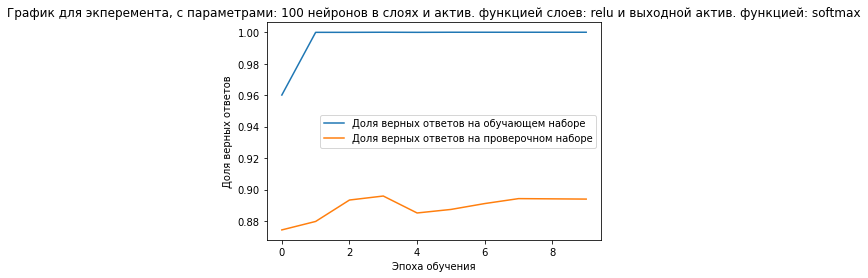

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   94% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 86% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   83% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     79% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

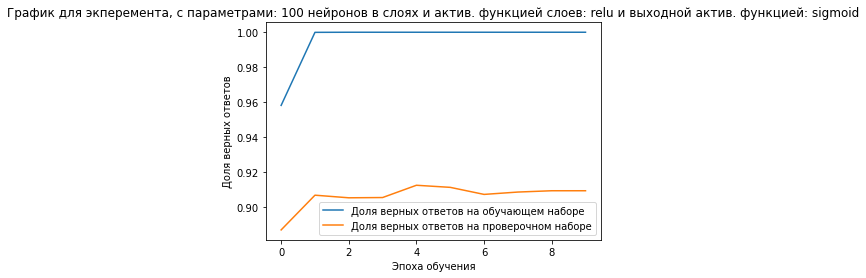

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 90% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   82% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     82% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       92% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
************************************************************

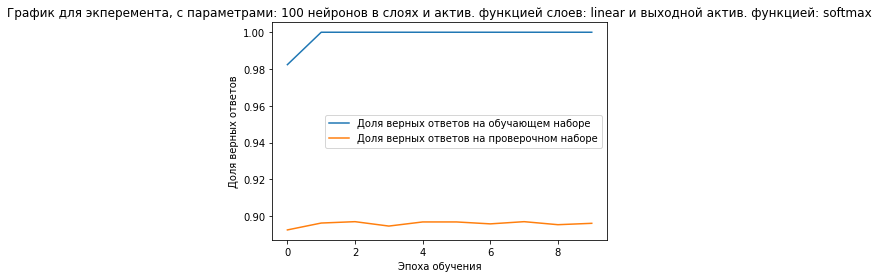

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 93% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   82% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       86% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

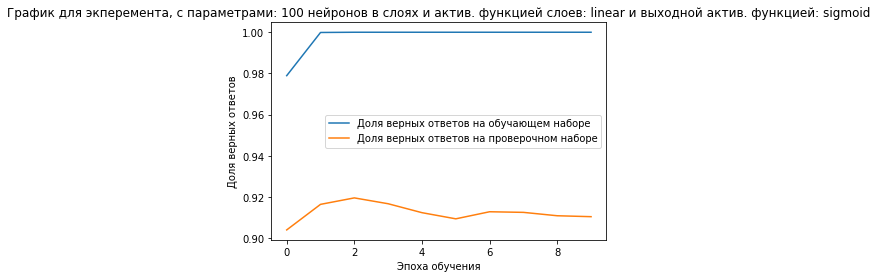

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   85% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 85% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   89% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     87% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 91%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
************************************************************

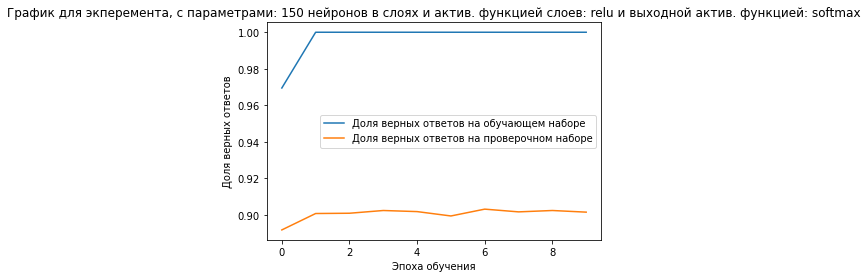

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   97% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 90% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   79% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

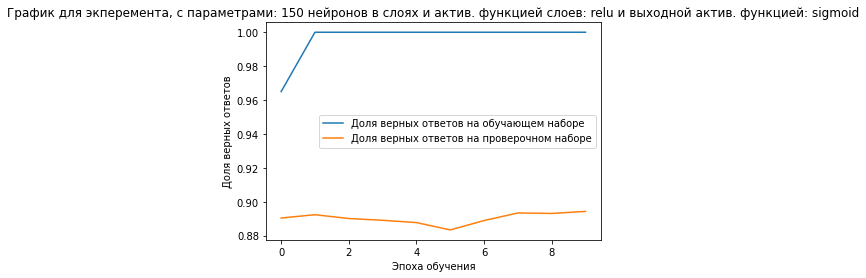

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   92% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 87% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   77% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     83% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       92% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
************************************************************

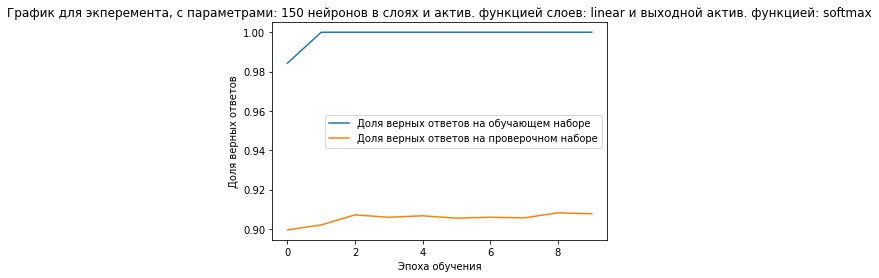

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 92% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   84% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     78% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

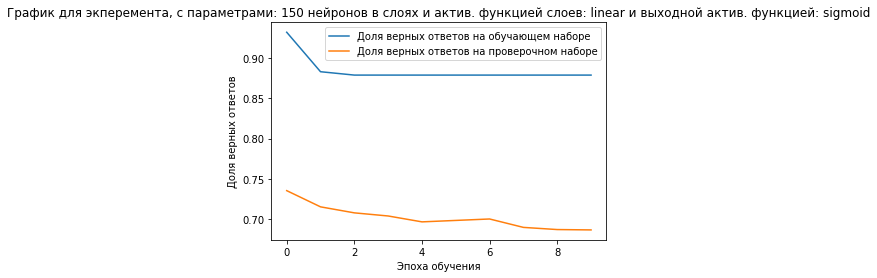

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   98% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 87% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   81% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     73% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       86% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  0% сеть отнесла к классу О. Генри    Это НЕПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 68%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
**********************************************************

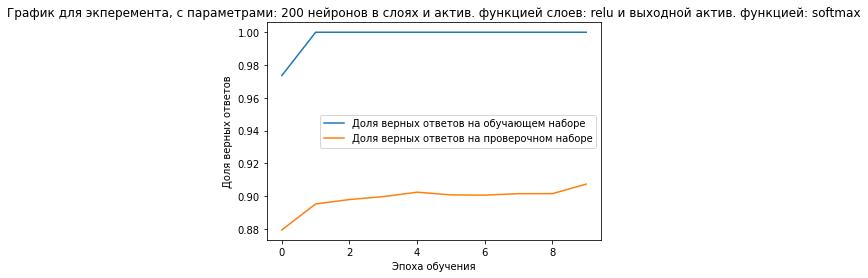

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   96% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 85% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   83% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       92% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

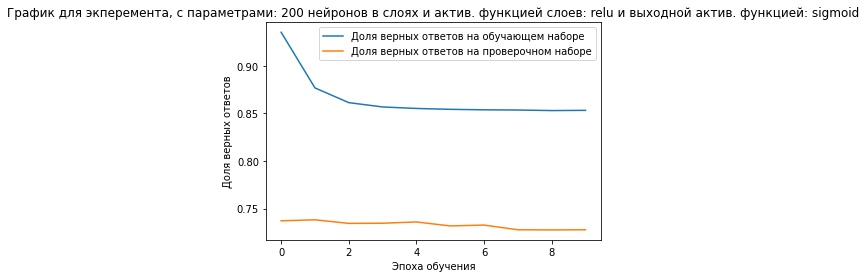

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   100% сеть отнесла к классу О. Генри  Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 89% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   0% сеть отнесла к классу О. Генри    Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Саймак     80% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  91% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 72%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
**********************************************************

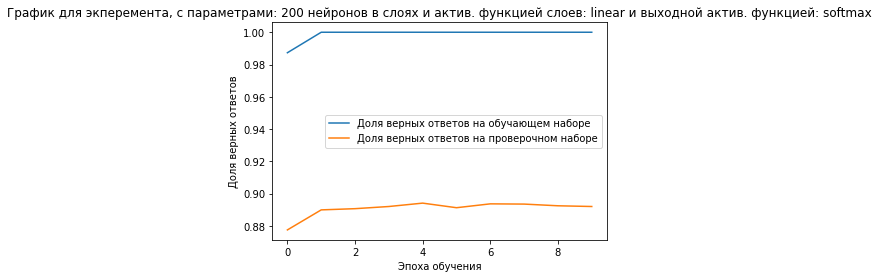

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 93% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   80% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     70% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

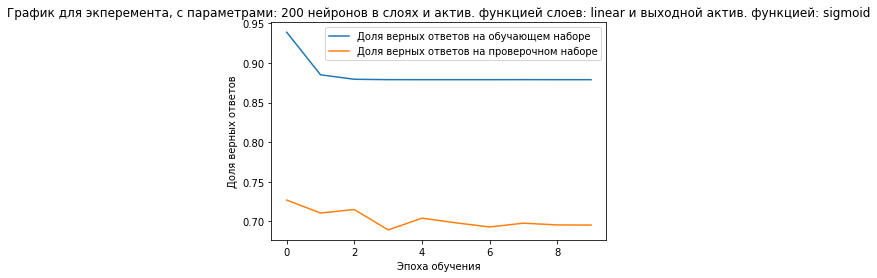

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   98% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 91% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   84% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     72% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       85% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  0% сеть отнесла к классу О. Генри    Это НЕПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 69%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
**********************************************************

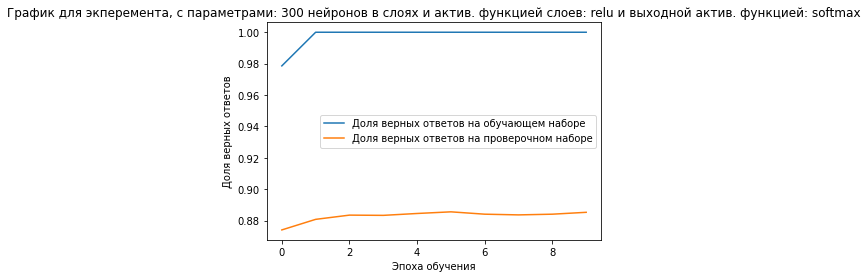

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   94% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 84% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   75% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     83% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       93% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  96% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

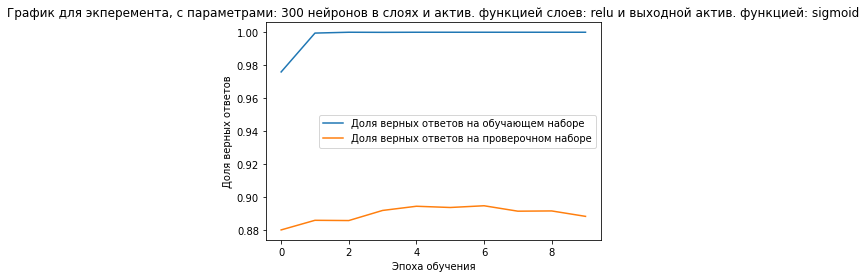

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   99% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 90% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   76% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     69% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       92% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
************************************************************

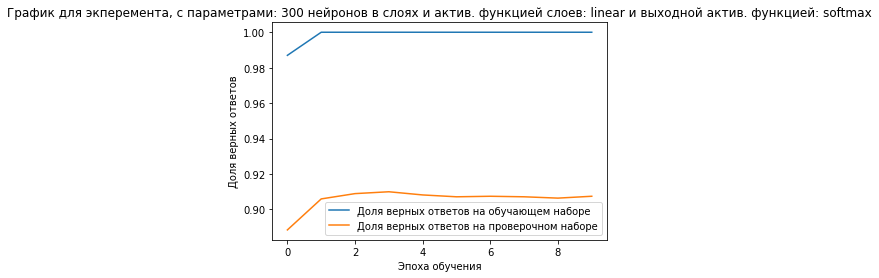

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   94% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 89% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   83% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     88% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

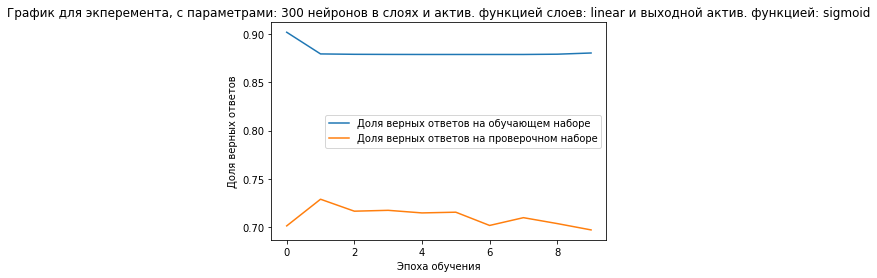

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   99% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 93% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   78% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     88% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       81% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  5% сеть отнесла к классу О. Генри    Это НЕПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 69%



In [ ]:
# 2) 2 Dense слоя, 2 Dropout, 2 BatchNormalization, выходной слой - Dense

maxWordsCount = 20000 # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов
N = [100, 150, 200, 300]  # количество нейронов в слоях 
A = ['relu', 'linear']
A_EXIT = ['softmax', 'sigmoid']
for n in N:
    flag = True
    for a in A:
        flag = True
        for a_exit in A_EXIT:
            flag = True
            print("**************************************************************************************************************************")
            print("Исследование для 2 Dense слоёв, 2 Dropout, 2 BatchNormalization, выходной слой - Dense")
            print("С параметрами: {} нейронов в слоях, активационной функцией слоев: {}  и выходной активационной функцией: {}".format(n, a, a_exit))
            print("**************************************************************************************************************************")
            cur_time = time.time()  # Засекаем текущее время
           
            # Воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
            tokenizer = Tokenizer(num_words=maxWordsCount,
                                  filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ',
                                  oov_token='unknown', char_level=False)

            tokenizer.fit_on_texts(
                trainText)  # "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
            items = list(tokenizer.word_index.items())  # Вытаскиваем индексы слов для просмотра
            print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

            # Преобразовываем текст в последовательность индексов согласно частотному словарю
            trainWordIndexes = tokenizer.texts_to_sequences(trainText)  # Обучающие тесты в индексы
            testWordIndexes = tokenizer.texts_to_sequences(testText)  # Проверочные тесты в индексы

            print("Статистика по обучающим текстам:")

            symbolsTrainText = 0  # Объявляем переменную для подсчета символов в обучающих текстах
            wordsTrainText = 0  # Объявляем переменную для подсчета слов в обучающих текстах

            for i in range(nClasses):  # Проходим по всем классам
                print(className[i], " " * (10 - len(className[i])), len(trainText[i]), "символов, ",
                      len(trainWordIndexes[i]), "слов")
                symbolsTrainText += len(trainText[i])  # Считаем символы
                wordsTrainText += len(trainWordIndexes[i])  # Считаем слова 

            print('----')
            print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
            print()
            print("Статистика по тестовым текстам:")

            symbolsTestText = 0  # Объявляем переменную для подсчета символов в тестовых текстах
            wordsTestText = 0  # Объявляем переменную для подсчета слов в тестовых текстах

            for i in range(nClasses):  # Проходим по всем классам
                print(className[i], ' ' * (10 - len(className[i])), len(testText[i]), "символов, ",
                      len(testWordIndexes[i]), "слов")
                symbolsTestText += len(testText[i])  # Считаем символы
                wordsTestText += len(testWordIndexes[i])  # Считаем слова 
            print('----')
            print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

            # Задаём базовые параметры
            xLen = 1000  # Длина отрезка текста, по которой анализируем, в словах
            step = 100  # Шаг разбиения исходного текста на обучающие векторы

            cur_time = time.time()  # Засекаем текущее время
            # Формируем обучающую и тестовую выборку
            xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)  # извлекаем обучающую выборку
            xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)  # извлекаем тестовую выборку
            print("Размер xTrain:", xTrain.shape)
            print("Размер yTrain:", yTrain.shape)
            print("Размер xTest:", xTest.shape)
            print("Размер yTest:", yTest.shape)
            # получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1
            print('Время на формирование обучающей и тестовой выборки: ', round(time.time() - cur_time, 2), 'c', sep='')

            cur_time = time.time()  # Засекаем текущее время
            # Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
            xTrain01 = tokenizer.sequences_to_matrix(
                xTrain.tolist())  # П одаем xTrain в виде списка, чтобы метод успешно сработал
            xTest01 = tokenizer.sequences_to_matrix(
                xTest.tolist())  # Подаем xTest в виде списка, чтобы метод успешно сработал
            print('Время на преобразование полученных выборки(BOW): ', round(time.time() - cur_time, 2), 'c', sep='')

            model01 = Sequential()
            
            # Первый полносвязный слой
            model01.add(Dense(n, input_dim=maxWordsCount, activation=a))
            # Слой регуляризации Dropout
            model01.add(Dropout(0.25))
            # Слой пакетной нормализации
            model01.add(BatchNormalization())
            
            # Второй полносвязный слой
            model01.add(Dense(n, input_dim=maxWordsCount, activation=a))
            # Слой регуляризации Dropout
            model01.add(Dropout(0.25))
            # Слой пакетной нормализации
            model01.add(BatchNormalization())
            
            # Выходной полносвязный слой
            model01.add(Dense(6, activation=a_exit))

            model01.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

            # Обучаем сеть на выборке, сформированной по bag of words - xTrain01
            history = model01.fit(xTrain01,
                                  yTrain,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(xTest01, yTest))

            data = data + [[2, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
            # визуализируем результаты
            plt.plot(history.history['accuracy'],
                     label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'],
                     label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            plt.title(title)
            plt.legend()
            plt.show()

            xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
            # Проверяем точность нейронки обученной на bag of words
            text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            pred = recognizeMultiClass(model01, xTest6Classes01, text)
            if (a_exit == 'sigmoid'): flag = False

        if (flag == True):
            data = data + [[2, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
            # визуализируем результаты
            plt.plot(history.history['accuracy'],
                     label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'],
                     label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            plt.title(title)
            plt.legend()
            plt.show()

            xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
            # Проверяем точность нейронки обученной на bag of words
            text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            pred = recognizeMultiClass(model01, xTest6Classes01, text)
        if (a == 'linear'): flag = False

    if (flag == True):
        data = data + [[2, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
        # визуализируем результаты
        plt.plot(history.history['accuracy'],
                 label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'],
             label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
        plt.title(title)
        plt.legend()
        plt.show()

        xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
        # Проверяем точность нейронки обученной на bag of words
        text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
        pred = recognizeMultiClass(model01, xTest6Classes01, text)  

In [ ]:
# Смотрим на промежуточные результаты эксперементов
df = pd.DataFrame(data, columns=['number_of_layers', 'neurons', 'activation', 'activation_exit', 'val_accuracy'])
df

,number_of_layers,neurons,activation,activation_exit,val_accuracy
0,1,100,relu,softmax,0.919
1,1,100,relu,sigmoid,0.908
2,1,100,linear,softmax,0.893
3,1,100,linear,sigmoid,0.922
4,1,150,relu,softmax,0.910
5,1,150,relu,sigmoid,0.745
6,1,150,linear,softmax,0.897
7,1,150,linear,sigmoid,0.903
8,1,200,relu,softmax,0.886
9,1,200,relu,sigmoid,0.922


**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
**************************************************************************************************************************
Время обработки: 2.43c
Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумме  11553605  символов,  1769573  слов 


Статистика по тестовым текстам:
О. Генри    349662 символов,  53238 слов
Стругацкие  704846 символов,  108621 слов
Булгаков    875042 символов,  132730 слов
Саймак      318811 символов,

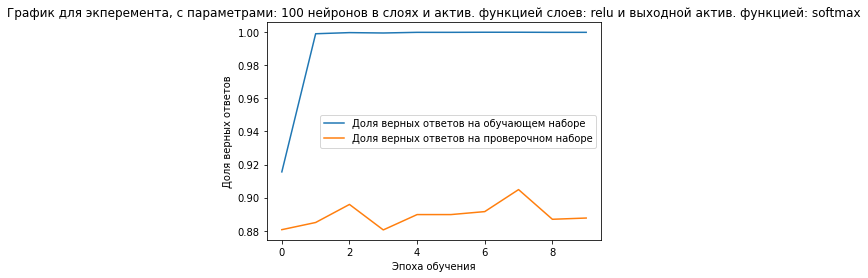

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   97% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 89% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   73% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     86% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  96% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

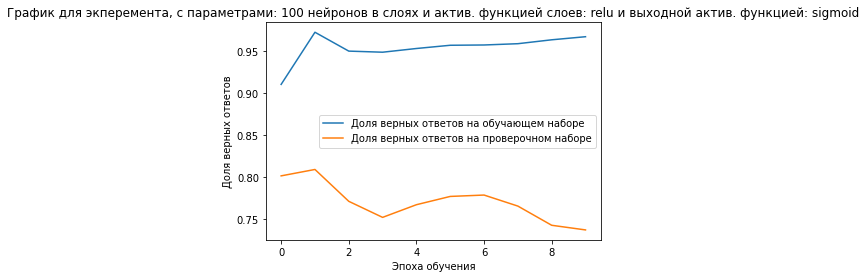

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   1% сеть отнесла к классу Брэдберри   Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 63% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   54% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     78% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       93% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 73%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
**********************************************************

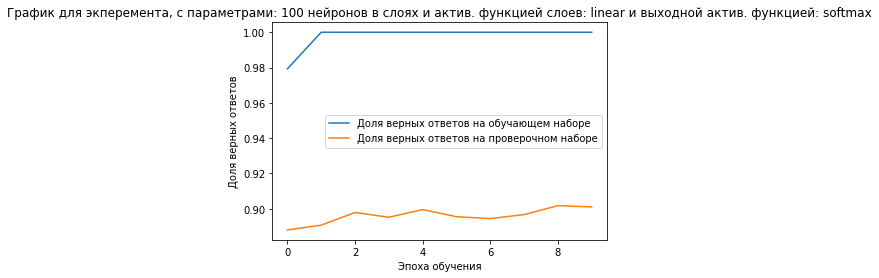

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 92% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   82% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     83% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 100 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

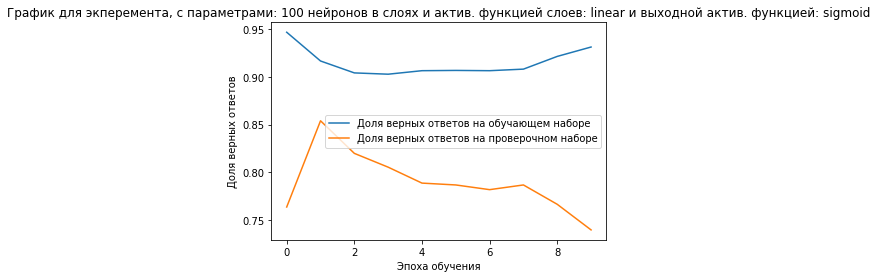

НЕЙРОНКА:  С параметрами: 100 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   0% сеть отнесла к классу Брэдберри   Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 73% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   73% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     30% сеть отнесла к классу Брэдберри  Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 73%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
********************************************************

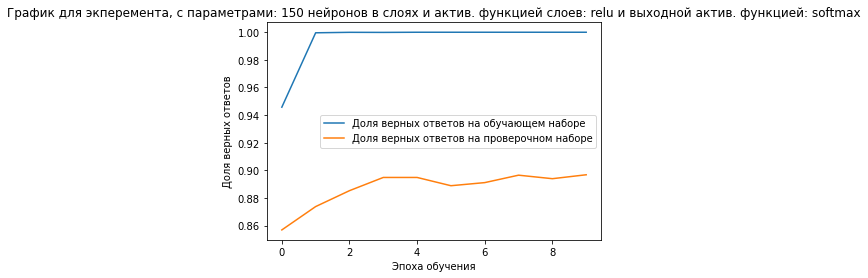

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   92% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 87% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   84% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     78% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       91% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

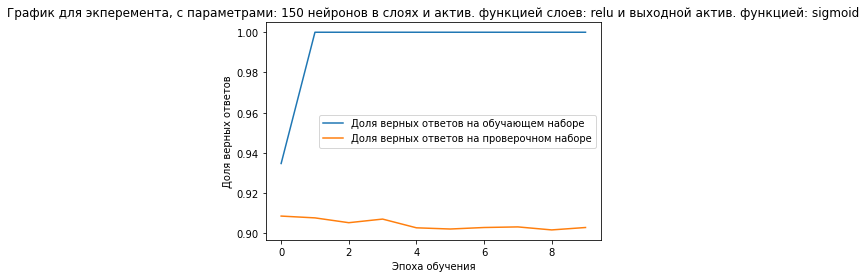

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   93% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 93% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   79% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     91% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  97% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
************************************************************

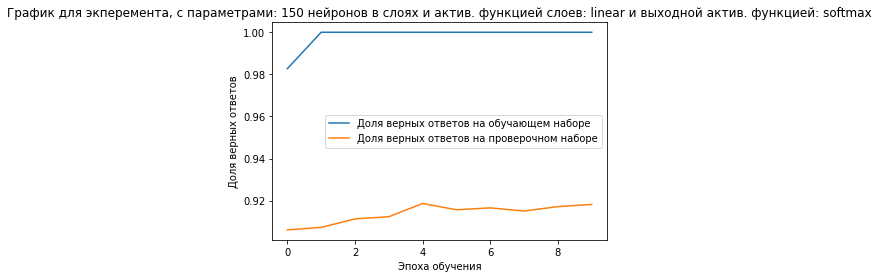

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   98% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 94% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   86% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     85% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       88% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 91%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 150 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

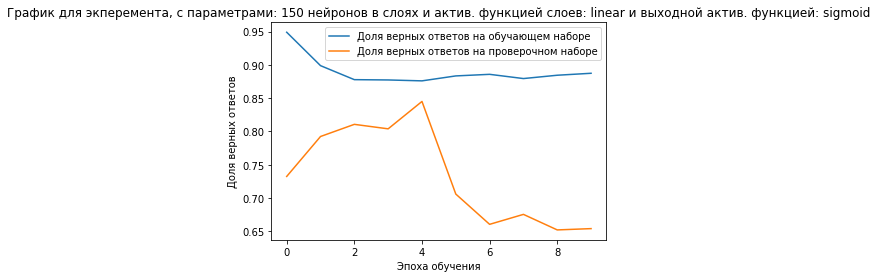

НЕЙРОНКА:  С параметрами: 150 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   99% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 85% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   79% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     41% сеть отнесла к классу О. Генри   Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Фрай       86% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  0% сеть отнесла к классу О. Генри    Это НЕПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 65%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
********************************************************

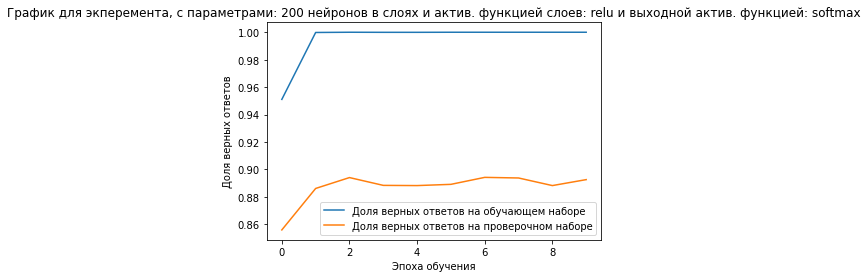

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   91% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 91% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   82% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     78% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       88% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

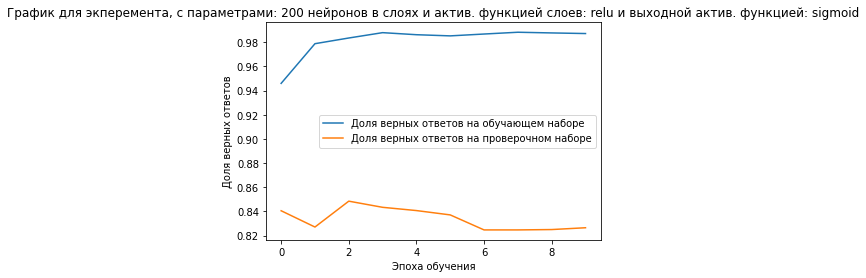

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   6% сеть отнесла к классу Брэдберри   Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 93% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   83% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     68% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  96% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 82%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
**********************************************************

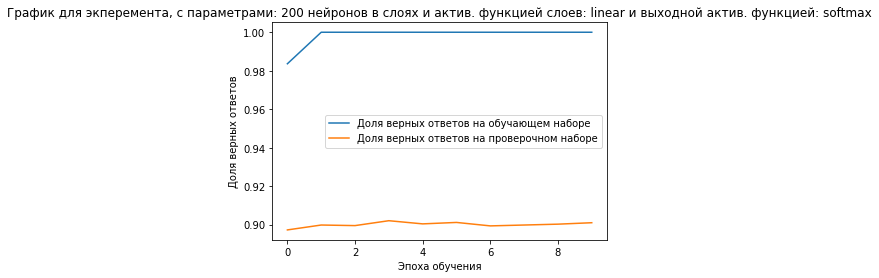

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   95% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 90% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   83% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 90%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 200 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

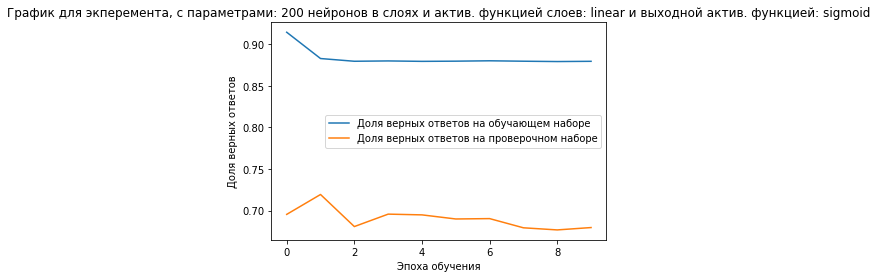

НЕЙРОНКА:  С параметрами: 200 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   100% сеть отнесла к классу О. Генри  Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 84% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   81% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     68% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       86% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  0% сеть отнесла к классу О. Генри    Это НЕПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 67%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: softmax
**********************************************************

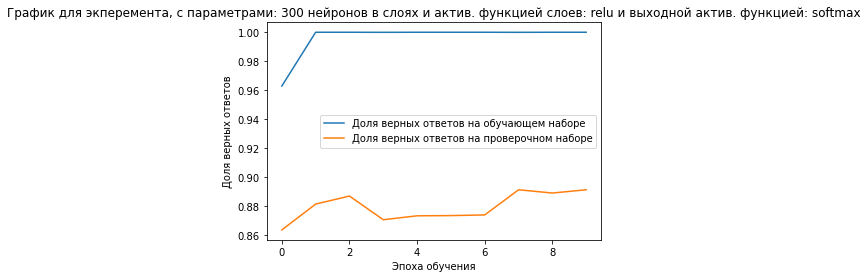

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: softmax

Класс: О. Генри   98% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 83% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   77% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       94% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  95% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: relu  и выходной активационной функцией: sigmoid
**************************************************************

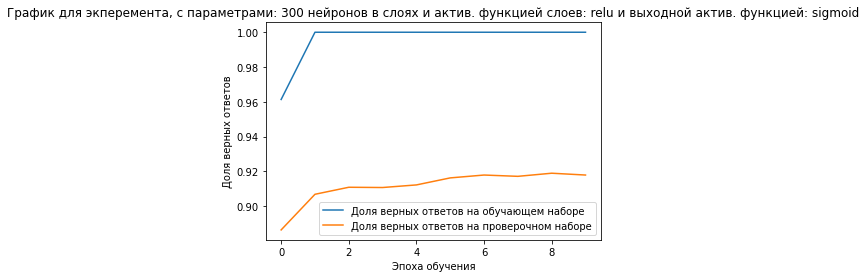

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: relu и выходной актив. функцией: sigmoid

Класс: О. Генри   94% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 93% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   85% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     88% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       90% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  99% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 91%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: softmax
************************************************************

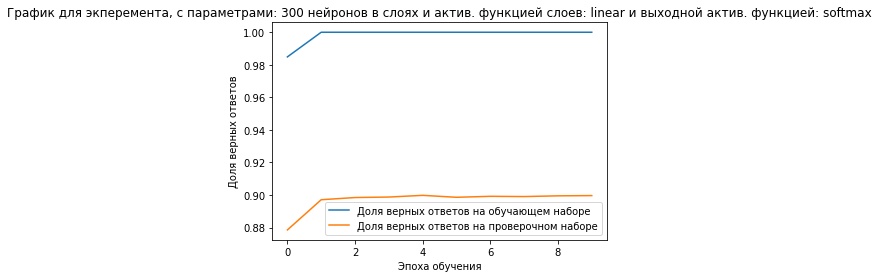

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: softmax

Класс: О. Генри   98% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 92% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   77% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     87% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       89% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

**************************************************************************************************************************
Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
С параметрами: 300 нейронов в слоях, активационной функцией слоев: linear  и выходной активационной функцией: sigmoid
**********************************************************

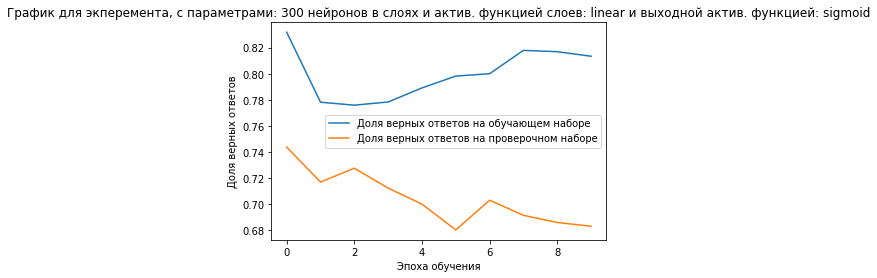

НЕЙРОНКА:  С параметрами: 300 нейронов в слоях и актив. функцией слоев: linear и выходной актив. функцией: sigmoid

Класс: О. Генри   5% сеть отнесла к классу Брэдберри   Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 88% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   17% сеть отнесла к классу О. Генри   Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Саймак     67% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       88% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  98% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 68%



In [ ]:
# 3) 3 Dense слоя, 3 Dropout, 3 BatchNormalization, выходной слой - Dense

maxWordsCount = 20000 # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов
N = [100, 150, 200, 300]  # количество нейронов в слоях 
A = ['relu', 'linear']
A_EXIT = ['softmax', 'sigmoid']
for n in N:
    flag = True
    for a in A:
        flag = True
        for a_exit in A_EXIT:
            flag = True
            print("**************************************************************************************************************************")
            print("Исследование для 3 Dense слоёв, 3 Dropout, 3 BatchNormalization, выходной слой - Dense")
            print("С параметрами: {} нейронов в слоях, активационной функцией слоев: {}  и выходной активационной функцией: {}".format(n, a, a_exit))
            print("**************************************************************************************************************************")
            cur_time = time.time()  # Засекаем текущее время
        
            # Воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
            tokenizer = Tokenizer(num_words=maxWordsCount,
                                  filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ',
                                  oov_token='unknown', char_level=False)

            tokenizer.fit_on_texts(
                trainText)  # "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
            items = list(tokenizer.word_index.items())  # Вытаскиваем индексы слов для просмотра
            print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

            # Преобразовываем текст в последовательность индексов согласно частотному словарю
            trainWordIndexes = tokenizer.texts_to_sequences(trainText)  # Обучающие тесты в индексы
            testWordIndexes = tokenizer.texts_to_sequences(testText)  # Проверочные тесты в индексы

            print("Статистика по обучающим текстам:")

            symbolsTrainText = 0  # Объявляем переменную для подсчета символов в обучающих текстах
            wordsTrainText = 0  # Объявляем переменную для подсчета слов в обучающих текстах

            for i in range(nClasses):  # Проходим по всем классам
                print(className[i], " " * (10 - len(className[i])), len(trainText[i]), "символов, ",
                      len(trainWordIndexes[i]), "слов")
                symbolsTrainText += len(trainText[i])  # Считаем символы
                wordsTrainText += len(trainWordIndexes[i])  # Считаем слова 

            print('----')
            print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
            print()
            print("Статистика по тестовым текстам:")

            symbolsTestText = 0  # Объявляем переменную для подсчета символов в тестовых текстах
            wordsTestText = 0  # Объявляем переменную для подсчета слов в тестовых текстах

            for i in range(nClasses):  # Проходим по всем классам
                print(className[i], ' ' * (10 - len(className[i])), len(testText[i]), "символов, ",
                      len(testWordIndexes[i]), "слов")
                symbolsTestText += len(testText[i])  # Считаем символы
                wordsTestText += len(testWordIndexes[i])  # Считаем слова 
            print('----')
            print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

            # Задаём базовые параметры
            xLen = 1000  # Длина отрезка текста, по которой анализируем, в словах
            step = 100  # Шаг разбиения исходного текста на обучающие векторы

            cur_time = time.time()  # Засекаем текущее время
            # Формируем обучающую и тестовую выборку
            xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)  # извлекаем обучающую выборку
            xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)  # извлекаем тестовую выборку
            print("Размер xTrain:", xTrain.shape)
            print("Размер yTrain:", yTrain.shape)
            print("Размер xTest:", xTest.shape)
            print("Размер yTest:", yTest.shape)
            # получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1
            print('Время на формирование обучающей и тестовой выборки: ', round(time.time() - cur_time, 2), 'c', sep='')

            cur_time = time.time()  # Засекаем текущее время
            # Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
            xTrain01 = tokenizer.sequences_to_matrix(
                xTrain.tolist())  # П одаем xTrain в виде списка, чтобы метод успешно сработал
            xTest01 = tokenizer.sequences_to_matrix(
                xTest.tolist())  # Подаем xTest в виде списка, чтобы метод успешно сработал
            print('Время на преобразование полученных выборки(BOW): ', round(time.time() - cur_time, 2), 'c', sep='')

            model01 = Sequential()
            
            # Первый полносвязный слой
            model01.add(Dense(n, input_dim=maxWordsCount, activation=a))
            # Слой регуляризации Dropout
            model01.add(Dropout(0.25))
            # Слой пакетной нормализации
            model01.add(BatchNormalization())
            
            # Второй полносвязный слой
            model01.add(Dense(n, input_dim=maxWordsCount, activation=a))
            # Слой регуляризации Dropout
            model01.add(Dropout(0.25))
            # Слой пакетной нормализации
            model01.add(BatchNormalization())

            # Третий полносвязный слой
            model01.add(Dense(n, input_dim=maxWordsCount, activation=a))
            # Слой регуляризации Dropout
            model01.add(Dropout(0.25))
            # Слой пакетной нормализации
            model01.add(BatchNormalization())
           
            # Выходной полносвязный слой
            model01.add(Dense(6, activation=a_exit))

            model01.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

            # Обучаем сеть на выборке, сформированной по bag of words - xTrain01
            history = model01.fit(xTrain01,
                                  yTrain,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(xTest01, yTest))

            data = data + [[3, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
            # визуализируем результаты
            plt.plot(history.history['accuracy'],
                     label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'],
                     label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            plt.title(title)
            plt.legend()
            plt.show()

            xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
            # Проверяем точность нейронки обученной на bag of words
            text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            pred = recognizeMultiClass(model01, xTest6Classes01, text)
            if (a_exit == 'sigmoid'): flag = False

        if (flag == True):
            data = data + [[3, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
            # визуализируем результаты
            plt.plot(history.history['accuracy'],
                     label='Доля верных ответов на обучающем наборе')
            plt.plot(history.history['val_accuracy'],
                     label='Доля верных ответов на проверочном наборе')
            plt.xlabel('Эпоха обучения')
            plt.ylabel('Доля верных ответов')
            title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            plt.title(title)
            plt.legend()
            plt.show()

            xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
            # Проверяем точность нейронки обученной на bag of words
            text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
            pred = recognizeMultiClass(model01, xTest6Classes01, text)
        if (a == 'linear'): flag = False

    if (flag == True):
        data = data + [[3, n, a, a_exit, round(model01.evaluate(xTest01, yTest, verbose=0)[1], 3)]]
        # визуализируем результаты
        plt.plot(history.history['accuracy'],
                 label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'],
             label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        title = "График для экперемента, с параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
        plt.title(title)
        plt.legend()
        plt.show()

        xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)  # Преобразование тестовой выборки
        # Проверяем точность нейронки обученной на bag of words
        text = "С параметрами: " + str(n) + " нейронов в слоях и актив. функцией слоев: " + str(a) + " и выходной актив. функцией: " + str(a_exit)
        pred = recognizeMultiClass(model01, xTest6Classes01, text)  

In [ ]:
# Итоговая таблица

# number_of_layers - количество слоев
#    1 - 1 Dense слой, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
#    2 - 2 Dense слоя, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
#    3 - 3 Dense слоя, 3 Dropout, 3 BatchNormalization, выходной слой - Dense 
# neurons - количество нейронов в слоях
# activation - функция активации
# activation_exit - функция активации в выходном слое
# val_accuracy - точность классификации на проверочной выборке

df = pd.DataFrame(data, columns=['number_of_layers', 'neurons', 'activation', 'activation_exit', 'val_accuracy'])
df

,number_of_layers,neurons,activation,activation_exit,val_accuracy
0,1,100,relu,softmax,0.919
1,1,100,relu,sigmoid,0.908
2,1,100,linear,softmax,0.893
3,1,100,linear,sigmoid,0.922
4,1,150,relu,softmax,0.910
5,1,150,relu,sigmoid,0.745
6,1,150,linear,softmax,0.897
7,1,150,linear,sigmoid,0.903
8,1,200,relu,softmax,0.886
9,1,200,relu,sigmoid,0.922


##### **Графики и выводы:**

1. Максимальную точность классификации 0.92% удалось получить на архитектуре:
 * 1 Dense слой, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
 * 200 нейронов
 * функция активации слоев - relu
 * функция активации на выходном слое - sigmoid
2. Минимальная точность классификации 0.65% получилась на архитектуре:
 * 3 Dense слоя, 3 Dropout, 3 BatchNormalization, выходной слой - Dense
 * 150 нейронов
 * функция активации слоев - linear
 * функция активации на выходном слое - sigmoid

**Значение терминов**(сокращений) которые будут использоватся мной при анализе и выводах:
 * **Однослойная архитектура** - 1 Dense слой, 1 Dropout, 1 BatchNormalization, выходной слой - Dense
 * **Двухслойная архитектура** - 2 Dense слоя, 2 Dropout, 2 BatchNormalization, выходной слой - Dense
 * **Трехслойная архитектура** - 3 Dense слоя, 3 Dropout, 3 BatchNormalization, выходной слой - Dense

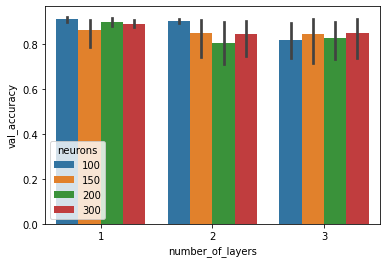

In [ ]:
# Построим дополнительные графики для визуализации результатов экспериментов
import seaborn as sns
sns.barplot(x="number_of_layers", y="val_accuracy", hue="neurons", data=df)

Из данного графика явно видна зависимость того что при двухслойной архитектуре максимальную точность классификации дает количество нейронов в слое = 100. Не так явно, но при однослойной архитектуре 100 нейронов тоже дают большую точность. А вот при 3 слоях, самой выйгрошной комбинацией оказалась с количеством нейронов = 300.

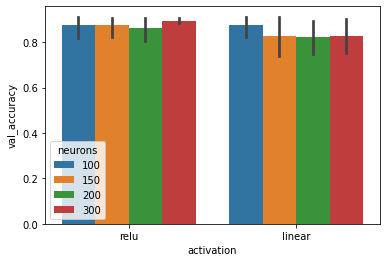

In [ ]:
sns.barplot(x="activation", y="val_accuracy", hue="neurons", data=df)

Из данного графика, можно сделать выводы, что вцелом точность классификации при активационной функции relu выше чем при использовании linear.
Также стоит отметить, что при использовании активационной функции linear, максимальной точности удалось достигнуть при количестве нейронов в слое = 100. Не так выражено, но как в linear, максимальной точности классификации при использовании функции активации relu удалось достичь при количестве нейронов вслое = 300. 

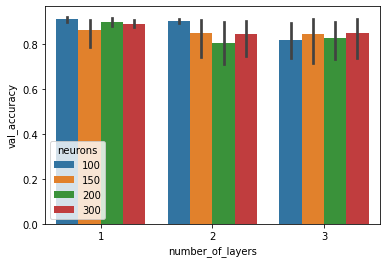

In [ ]:
sns.barplot(x="number_of_layers", y="val_accuracy", hue="neurons", data=df)

Из данного графика видно, что средняя точность классификации выше в однослойной архитектуре. Также явно прослеживается, то что при использовании двухслойной архитекруры, максимальной точности удалось достичь при количестве нейронов в основных(скрытых) слоях = 100, а минимальной при 200 нейронах.

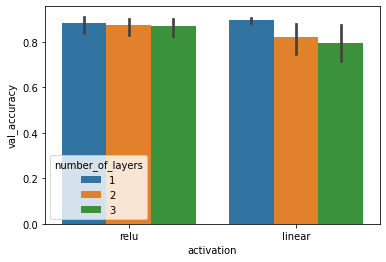

In [ ]:
sns.barplot(x="activation", y="val_accuracy", hue="number_of_layers", data=df)

Из графика видно, что при использовании функции активации в основных(скрытых) слоях - relu, количество слоев в архитектуре сети(1,2,3) особого влияния на точность классификации не имеет. А вот при при использовании linear, явное преимущество в точности классификации дает однослойная архитектура, а минимальная точность получается при использовании трехслойной архитектуры. Тоесть прослеживается зависимость(для activation = linear), чем больше слоев - тем меньше точность классификации.

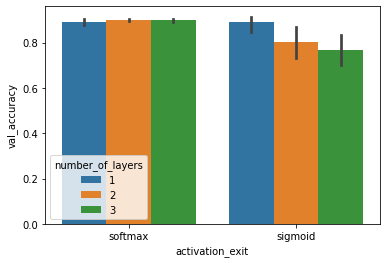

In [ ]:
sns.barplot(x="activation_exit", y="val_accuracy", hue="number_of_layers", data=df)

При использовании функции активации на выходном слое - softmax, количество слоев в архитектуре сети(1,2,3) особого влияния не имеет. А вот при при использовании sigmoid, явное преимущество в точности классификации дает однослойная архитектура, а минимальная точность получается при использовании трехслойной архитектуры. Тоесть прослеживается зависимость(для activation_exit = sigmoid), чем больше слоев - тем меньше точность классификации.

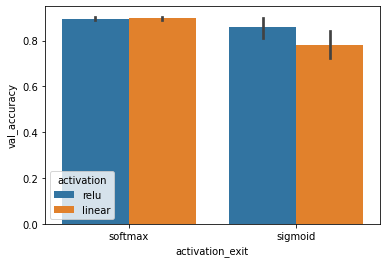

In [ ]:
sns.barplot(x="activation_exit", y="val_accuracy", hue="activation", data=df)

При использовании функции активации на выходном слое - softmax, функция активации(relu или linear) основных(скрытых) слоев особого влияния не имеет. А вот при при использовании sigmoid, явное преимущество в точности классификации дает relu.

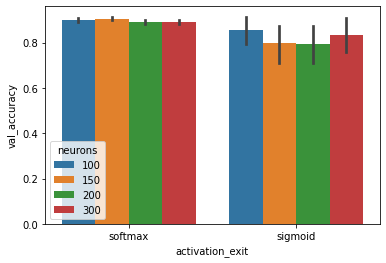

In [ ]:
sns.barplot(x="activation_exit", y="val_accuracy", hue="neurons", data=df)

При использовании функции активации на выходном слое - softmax, количество нейронов (100, 150, 200, 300) в основных(скрытых) слоях особого влияния не имеет. А вот при при использовании sigmoid, явное преимущество в точности классификации дает количество 100 и чуть менее сильное влияние - 300 нейронов.

Вцелом, исходя из графиков доли верных ответов на каждой эпохе обучения, построенных для каждого эксперемента, можно отметить явную зависимость того что при использовании в качестве функции активации на выходном слое sigmoid, переобучение наступает быстрее и чаще. Что говорит о нежелательности ее использования для решения задач классификации.

Также стоит отметить что простая однослойная архитектура дала лучшие результаты точности, чем архитектура с 2мя и 3мя слоями. Видимо это связано с тем что исходные данные небольшие, а для небольшой базы - архитектуру лучше использовать попроще.

#### **3) Запустите нейронку c Embbedding при maxWordsCount = 50000, поменяйте размер Embedding пространства**


In [ ]:
dataEm = []
dataEm

[]

******************************************************
Исследование для размера Embedding пространства =  10
******************************************************
Epoch 1/10
138/138 [==============================] - 3s 22ms/step - loss: 1.2108 - accuracy: 0.5557 - val_loss: 2.1228 - val_accuracy: 0.2900
Epoch 2/10
138/138 [==============================] - 3s 21ms/step - loss: 0.5035 - accuracy: 0.8418 - val_loss: 2.6235 - val_accuracy: 0.2939
Epoch 3/10
138/138 [==============================] - 3s 21ms/step - loss: 0.2348 - accuracy: 0.8745 - val_loss: 1.8296 - val_accuracy: 0.4474
Epoch 4/10
138/138 [==============================] - 3s 21ms/step - loss: 0.1789 - accuracy: 0.8965 - val_loss: 1.5980 - val_accuracy: 0.4891
Epoch 5/10
138/138 [==============================] - 3s 21ms/step - loss: 0.1069 - accuracy: 0.9518 - val_loss: 1.2517 - val_accuracy: 0.5790
Epoch 6/10
138/138 [==============================] - 3s 21ms/step - loss: 0.0123 - accuracy: 0.9984 - val_loss: 0.9852 -

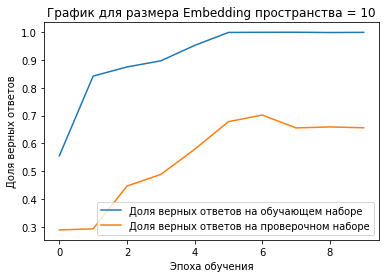

НЕЙРОНКА:  Тексты Embedding + Dense для размера Embedding пространства = 10

Класс: О. Генри   85% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 42% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   64% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     57% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       68% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  76% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 65%

******************************************************
Исследование для размера Embedding пространства =  50
******************************************************
Epoch 1/10
138/138 [==============================] - 10s 71ms/step - loss: 1.0402 - accuracy: 0.6943 - val_loss: 2.5460 - val_accuracy: 0.2929
Epoch 2/10
138/138 [==============================] - 9s 69ms/step - loss: 0.3504 - accuracy: 0.8940 - val_loss: 2.64

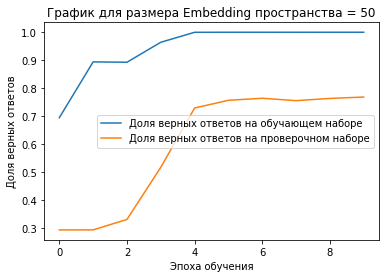

НЕЙРОНКА:  Тексты Embedding + Dense для размера Embedding пространства = 50

Класс: О. Генри   81% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 58% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   59% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     84% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       93% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  80% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 76%

******************************************************
Исследование для размера Embedding пространства =  200
******************************************************
Epoch 1/10
138/138 [==============================] - 32s 230ms/step - loss: 0.9647 - accuracy: 0.7353 - val_loss: 3.1711 - val_accuracy: 0.2929
Epoch 2/10
138/138 [==============================] - 31s 223ms/step - loss: 0.2865 - accuracy: 0.8958 - val_loss: 

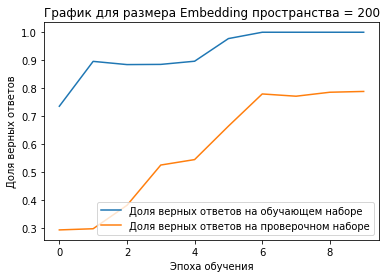

НЕЙРОНКА:  Тексты Embedding + Dense для размера Embedding пространства = 200

Класс: О. Генри   87% сеть отнесла к классу О. Генри   Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 66% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   65% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     74% сеть отнесла к классу Саймак     Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       88% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  86% сеть отнесла к классу Брэдберри  Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 78%



In [ ]:
# Так как максимальных размер maxWordsCount который способен обработать 
# Колаб не упав это 28 000, то экперимент будет проходить на данном размере maxWordsCount.

maxWordsCount = 28000

E = [10, 50, 200] # размер Embedding пространства
for e in E:
  print("******************************************************")
  print("Исследование для размера Embedding пространства = ", e)
  print("******************************************************") 
  modelE = Sequential()
  modelE.add(Embedding(maxWordsCount, e, input_length=xLen))
  modelE.add(SpatialDropout1D(0.2))
  modelE.add(Flatten())
  modelE.add(BatchNormalization())
  modelE.add(Dense(200, activation="relu"))
  modelE.add(Dropout(0.2))
  modelE.add(BatchNormalization())
  modelE.add(Dense(6, activation='sigmoid'))

  modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

  #Обучаем сеть на xTrain
  history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest, yTest))
  
  dataEm = dataEm + [[e, round(modelE.evaluate(xTest, yTest, verbose=0)[1], 3)]]

  # Визуализируем результат
  plt.plot(history.history['accuracy'], 
  label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
  label='Доля верных ответов на проверочном наборе')
  title = "График для размера Embedding пространства = " + str(e)
  plt.title(title)
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

  #Проверяем результаты работы Ebedding сети
  _, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step) #Преобразование тестовой выборки
  text = "Тексты Embedding + Dense для размера Embedding пространства = " + str(e)
  pred = recognizeMultiClass(modelE, xTest6Classes, text)

In [ ]:
import pandas as pd # Подключаем библиотеку Pandas
dfEm = pd.DataFrame(dataEm, columns=['Размер Embedding пространства', 'val_accuracy'])
dfEm

,Размер Embedding пространства,val_accuracy
0,10,0.656
1,50,0.768
2,200,0.788


##### **Выводы:**

Из таблицы выше, видно что при увеличении размера Embedding пространства, точность классификации данных на проверочной выборке возрастает. Из проведенного эксперемента можно сделать вывод, что для данной архитектуры маленький размер ( < 50 ) Embedding пространства, лучше не ипользовать, так как это уменьшает точность классификации.
При размерах Embedding пространства (50 - 200) точность возрастает.
Но разница в точности не слижком большая, что при 50,что при 200, следовательно это говорит о том что в данном диапазоне нужно каждый раз (для разных гиперпораметров) смотреть какой размер Embedding пространства лучше. В данном, конкретном случае при размере 200 точность немного, но выше чем при 50.

## **PRO**

### **Вариант 1**

**Задание:** Добейтесь точности распознавания 97% и верно распознанных всех писателей с помощью любой нейронной сети без фильтрации данных. 


In [ ]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time

In [ ]:
!rm -R /content/texts # Проверяем наличие папки texts. Если есть, удаляем ее

In [ ]:
# Указываем путь к базе в Google Drive, создаем папку texts и извлекаем туда базу
!unzip -q '/content/drive/My Drive/Colab Notebooks/Базы/Тексты писателей.zip' -d /content/texts 

In [ ]:
def readText(fileName): # Объявляем функции для чтения файла. На вход отправляем путь к файлу
  f = open(fileName, 'r')        # Задаем открытие нужного файла в режиме чтения
  text = f.read()                # Читаем текст
  text = text.replace("\n", " ") # Переносы строки переводим в пробелы
  
  return text                    # Возвращаем текст файла

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"] # Объявляем интересующие нас классы
nClasses = len(className) # Считаем количество классов

In [ ]:
#Загружаем обучающие тексты

trainText = [] #Формируем обучающие тексты
testText = [] #Формируем тестовые тексты

#Формирование необходимо произвести следующим образом 
#Класс каждого i-ого эллемента в обучающей выборке должен соответствовать 
#классу каждого i-ого эллемента в тестовой выборке

for i in className: #Проходим по каждому классу
  for j in os.listdir('texts/'): #Проходим по каждому файлу в папке с текстами #
    if i in j: #Проверяем, содержит ли файл j в названии имя класса i
      
      if 'Обучающая' in j: #Если в имени найденного класса есть строка "Обучающая" 
        trainText.append(readText('texts/' + j)) #добавляем в обучающую выборку
        print(j, 'добавлен в обучающую выборку') #Выводим информацию
      if 'Тестовая' in j: #Если в имени найденного класса есть строка "Тестовая"
        testText.append(readText('texts/' + j)) #добавляем в обучающую выборку
        print(j, 'добавлен в тестовую выборку') #Выводим информацию
  print()

(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку
(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку

(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку



In [ ]:
print(len(trainText)) # Количество элементов в trainText
print(len(trainText[0])) # Количество символов в первом источнике в trainText

6
1049517


In [ ]:
cur_time = time.time() # Засекаем текущее время
maxWordsCount = 20000 # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов

# Воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
# без фильтрации
# num_words=maxWordsCount - определяем максимальное количество слов/индексов, учитываемое при обучении текстов
# split=' ' - разделяем слова по пробелу
# char_level=False - просим токенайзер не удалять однобуквенные слова
tokenizer = Tokenizer(num_words=maxWordsCount, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(trainText) # "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) # Вытаскиваем индексы слов для просмотра
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

Время обработки: 2.26c


In [ ]:
print(items[-10:]) # Посмотрим 50 самых часто встречающихся слов
print("Размер словаря", len(items)) # Длина словаря

[('свистком', 146929), ('потерян', 146930), ('существуете»', 146931), ('расплывающиеся', 146932), ('миллионе', 146933), ('разрыв…»', 146934), ('«космос', 146935), ('зияющая', 146936), ('ничтонавстречу', 146937), ('утру…»', 146938)]
Размер словаря 146938


In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # Обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  # Проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1][:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20], '\n')

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Он же в виде последовательности индексов:  [472, 24, 1, 1539, 55, 2, 12808, 7786, 6, 424, 1, 5, 257, 2, 5, 250, 57, 7, 244, 10586] 



In [ ]:
print("Статистика по обучающим текстам:")

symbolsTrainText = 0 # Объявляем переменную для подсчета символов в обучающих текстах
wordsTrainText = 0 # Объявляем переменную для подсчета слов в обучающих текстах

for i in range(nClasses): # Проходим по всем классам
  print(className[i], " "*(10-len(className[i])), len(trainText[i]), "символов, ", len(trainWordIndexes[i]), "слов")
  symbolsTrainText += len(trainText[i]) # Считаем символы
  wordsTrainText += len(trainWordIndexes[i]) # Считаем слова 

print('----')
print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
print()
print("Статистика по тестовым текстам:")

symbolsTestText = 0 # Объявляем переменную для подсчета символов в тестовых текстах
wordsTestText = 0 # Объявляем переменную для подсчета слов в тестовых текстах

for i in range(nClasses): #Проходим по всем классам
  print(className[i], ' '*(10-len(className[i])), len(testText[i]), "символов, ", len(testWordIndexes[i]), "слов")
  symbolsTestText += len(testText[i]) #Считаем символы
  wordsTestText += len(testWordIndexes[i]) #Считаем слова 
print('----')
print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

Статистика по обучающим текстам:
О. Генри    1049517 символов,  164661 слов
Стругацкие  2042469 символов,  330480 слов
Булгаков    1765648 символов,  269969 слов
Саймак      1609507 символов,  261266 слов
Фрай        3700010 символов,  599742 слов
Брэдберри   1386454 символов,  221330 слов
----
В сумме  11553605  символов,  1847448  слов 


Статистика по тестовым текстам:
О. Генри    349662 символов,  54729 слов
Стругацкие  704846 символов,  113522 слов
Булгаков    875042 символов,  138366 слов
Саймак      318811 символов,  52445 слов
Фрай        1278191 символов,  206373 слов
Брэдберри   868673 символов,  137022 слов
----
В сумме  4395225  символов,  702457  слов


In [ ]:
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
def getSetFromIndexes(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна
  xSample = [] # Объявляем переменную для векторов
  wordsLen = len(wordIndexes) # Считаем количество слов
  index = 0 # Задаем начальный индекс 

  while (index + xLen <= wordsLen):# Идём по всей длине вектора индексов
    xSample.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
    index += step # Смещаеммся вперёд на step
    
  return xSample

In [ ]:
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
def createSetsMultiClasses(wordIndexes, xLen, step): # Функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из 6 классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # Задаем количество классов выборки
  classesXSamples = []        # Здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна (например, 6 по 1341*1000)"
  for wI in wordIndexes:      # Для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # Добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  # Формируем один общий xSamples
  xSamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна (например, 15779*1000)"
  ySamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): # В диапазоне кол-ва классов(6)
    xT = classesXSamples[t] # Берем очередной текст вида "кол-во окон в тексте*длину окна"(например, 1341*1000)
    for i in range(len(xT)): # И каждое его окно
      xSamples.append(xT[i]) # Добавляем в общий список выборки
      ySamples.append(utils.to_categorical(t, nClasses)) # Добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) # Переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # Переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #Функция возвращает выборку и соответствующие векторы классов

In [ ]:
#Задаём базовые параметры
xLen = 10000 #Длина отрезка текста, по которой анализируем, в словах
step = 100 #Шаг разбиения исходного текста на обучающие векторы

In [ ]:
cur_time = time.time() # Засекаем текущее время
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

(17877, 10000)
(17877, 6)
(6428, 10000)
(6428, 6)
Время обработки: 19.53c


In [ ]:
cur_time = time.time() # Засекаем текущее время
# Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist()) #П одаем xTrain в виде списка, чтобы метод успешно сработал
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist()) # Подаем xTest в виде списка, чтобы метод успешно сработал

print(xTrain01.shape)       # Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][0:100]) # Фрагмент набора слов в виде Bag of Words
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

(17877, 20000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Время обработки: 64.21c


In [ ]:
for i in range(100):
  print(int(i in xTrain[0]),end=' ')

0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

Epoch 1/35
140/140 [==============================] - 2s 14ms/step - loss: 0.0449 - accuracy: 0.9867 - val_loss: 0.1312 - val_accuracy: 0.9854
Epoch 2/35
140/140 [==============================] - 2s 11ms/step - loss: 5.6325e-04 - accuracy: 1.0000 - val_loss: 0.0833 - val_accuracy: 0.9866
Epoch 3/35
140/140 [==============================] - 2s 11ms/step - loss: 2.6234e-04 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9888
Epoch 4/35
140/140 [==============================] - 2s 12ms/step - loss: 1.5670e-04 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9858
Epoch 5/35
140/140 [==============================] - 2s 11ms/step - loss: 1.1162e-04 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9843
Epoch 6/35
140/140 [==============================] - 2s 11ms/step - loss: 8.8579e-05 - accuracy: 1.0000 - val_loss: 0.0637 - val_accuracy: 0.9848
Epoch 7/35
140/140 [==============================] - 2s 12ms/step - loss: 1.0451e-04 - accuracy: 1.0000 - val_loss: 0.060

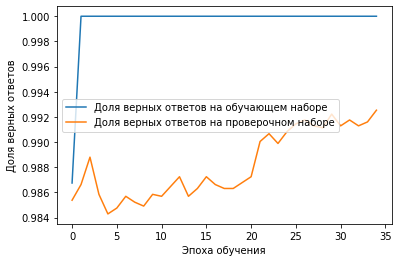

In [ ]:
#Создаём полносвязную сеть
model01 = Sequential()

#Первый полносвязный слой
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Слой пакетной нормализации
model01.add(BatchNormalization())

#Второй полносвязный слой
model01.add(Dense(400, input_dim=maxWordsCount, activation="relu"))
#Слой пакетной нормализации
model01.add(BatchNormalization())
#Слой регуляризации Dropout
model01.add(Dropout(0.4))

#Выходной полносвязный слой
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=35,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# Представляем тестовую выборку в удобных для распознавания размерах
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #Задаем количество классов
  xTest6Classes01 = []               #Здесь будет список из всех классов, каждый размером "кол-во окон в тексте * 20000 (при maxWordsCount=20000)"
  xTest6Classes = []                 #Здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #Для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #Тестовая выборка размером "кол-во окон*длину окна"(например, 420*1000)
    xTest6Classes.append(sample)              # Добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #Трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #И добавляется к нашему списку, 
  xTest6Classes = np.array(xTest6Classes)                     #И добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

# Распознаём тестовую выборку и выводим результаты
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  totalSumRec = 0 # Сумма всех правильных ответов
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)

    evVal = []
    for j in range(nClasses):
      evVal.append(len(currOut[currOut==j])/len(xTest[i]))

    totalSumRec += len(currOut[currOut==i])
    recognizedClass = np.argmax(evVal) #Определяем, какой класс в итоге за какой был распознан
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "Это НЕПРАВИЛЬНЫЙ ответ!"
    if (recognizedClass == i):
      isRecognized = "Это ПРАВИЛЬНЫЙ ответ!"
    str1 = 'Класс: ' + className[i] + " " * (11 - len(className[i])) + str(int(100*evVal[i])) + "% сеть отнесла к классу " + className[recognizedClass]
    print(str1, " " * (55-len(str1)), isRecognized, sep='')
  
  #Выводим средний процент распознавания по всем классам вместе
  print()
  sumCount = 0
  for i in range(nClasses):
    sumCount += len(xTest[i])
  print("Средний процент распознавания ", int(100*totalSumRec/sumCount), "%", sep='')

  print()
  
  return totalSumRec/sumCount

In [ ]:
xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step) #Преобразование тестовой выборки

In [ ]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри   100% сеть отнесла к классу О. Генри  Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 100% сеть отнесла к классу СтругацкиеЭто ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   99% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     100% сеть отнесла к классу Саймак    Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       97% сеть отнесла к классу Фрай       Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  100% сеть отнесла к классу Брэдберри Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 99%



In [ ]:
last_val_accuracy = history.history['val_accuracy'][-1]
print("Точность классификации данных на проверочной выборке:", round(last_val_accuracy*100, 2), "%")

Точность классификации данных на проверочной выборке: 99.25 %


**Итог :**  
Точность классификации данных на проверочной выборке составила **99,25%**

Средний процент распознавания всех писателей  - **99%**



## **ULTRA PRO**

### **Вариант 1**

**Задание:** Выгрузите какой-нибудь из ваших диалогов любой соц.сети и напишите нейронную сеть для классификации собеседника по сообщению. Использование групповых чатов для обучения поощряется, но усложняет задачу. Если необходима конфиденциальность, датасет можно не предоставлять. Добейтесь хорошей точности (65% -70% и выше).

In [ ]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time

**Данные чата использующегося в задании:**
* Чат выгружен из мессенджера WhatsApp
* Число собеседников: 3
* Язык переписки: Английский


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Базы/chat.csv') #загружаем данные в dataframe
df = df.iloc[:, :2] #извлечём тексты сообщений и соответствующие им имена отправителей
df.head(3)    #посмотрим на содержимое

,name,text
0,John,Thank you!
1,Mon Jerby,Welcome)))
2,Екатерина Яковлева,You going to watch Captain Marvel sometime? A...


In [ ]:
print(df.shape) #Выведем форму таблицы

(189, 2)


In [ ]:
print(df.values[0]) #Выведем пример из таблицы 

['John' ' Thank you!']


In [ ]:
for cl in df['name'].unique(): #Проходим по всем классам
  print('Количество записей класса ', cl, ': ', df[df.name == cl].shape[0])
  

Количество записей класса  John :  26
Количество записей класса  Mon Jerby :  93
Количество записей класса  Екатерина Яковлева :  70


In [ ]:
texts = df['text'].values #Извлекаем данные всех текстов из столбца text
classes = list(df['name'].values) #Извлекаем соответствующие им значения классов из столбца name
maxWordsCount = 60000 #Зададим максимальное количество слов/индексов, учитываемое при обучении текстов

print(df['name'].unique()) #Выводим все уникальные значения классов
nClasses = df['name'].nunique() + 1  #Задаём количество классов, обращаясь к столбцу name и оставляя уникальные значения
print(nClasses) #Посмотрим на количество классов

['John' 'Mon Jerby' 'Екатерина Яковлева']
4


In [ ]:
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#Для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
#num_words=maxWordsCount - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' - избавляемся от ненужных символов
#lower=True - приводим слова к нижнему регистру
#split=' ' - разделяем слова по пробелу
#char_level=False - просим токенайзер не удалять однобуквенные слова
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(texts) #"Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности

#Формируем матрицу индексов по принципу Bag of Words
xAll = tokenizer.texts_to_matrix(texts) #Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
print(xAll.shape)  #Посмотрим на форму текстов
print(xAll[0, :20])#И отдельно на фрагмент начала вектора

(189, 60000)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index.items()) #Вытаскиваем индексы слов для просмотра

dict_items([('unknown', 1), ('you', 2), ('i', 3), ('and', 4), ('to', 5), ('the', 6), ('will', 7), ('it', 8), ('a', 9), ('is', 10), ('in', 11), ('have', 12), ('hello', 13), ('good', 14), ('but', 15), ('your', 16), ('so', 17), ('be', 18), ('happy', 19), ('for', 20), ('my', 21), ('of', 22), ('as', 23), ('yes', 24), ('that', 25), ('this', 26), ('was', 27), ('😃', 28), ('love', 29), ('am', 30), ('not', 31), ('hotel', 32), ('on', 33), ('with', 34), ('hope', 35), ('too', 36), ('me', 37), ('back', 38), ('thank', 39), ('😊', 40), ('weekend', 41), ('from', 42), ('watch', 43), ('how', 44), ('or', 45), ('if', 46), ('can', 47), ('tomorrow', 48), ('would', 49), ('like', 50), ('night', 51), ('all', 52), ('just', 53), ('are', 54), ('at', 55), ('england', 56), ('avengers', 57), ('файл', 58), ('добавлен', 59), ('crazy', 60), ('long', 61), ('what', 62), ('did', 63), ('take', 64), ('easter', 65), ('time', 66), ('must', 67), ('when', 68), ('work', 69), ('trip', 70), ('dubai', 71), ('hi', 72), ('doing', 73), 

In [ ]:
print("Размер словаря", len(tokenizer.word_index.items()))

Размер словаря 494


In [ ]:
#Преобразовываем категории в векторы
encoder = LabelEncoder() # Вызываем метод кодирования тестовых лейблов из библиотеки sklearn
encoder.fit(classes) # Подгружаем в него категории из нашей базы
classesEncoded = encoder.transform(classes) # Кодируем категории
print(encoder.classes_)
print(classesEncoded.shape)
print(classesEncoded[:10])

['John' 'Mon Jerby' 'Екатерина Яковлева']
(189,)
[0 1 2 1 2 2 2 1 2 2]


In [ ]:
yAll = utils.to_categorical(classesEncoded, nClasses) # И выводим каждый лейбл в виде вектора длиной 22, с 1кой в позиции соответствующего класса и нулями
print(yAll.shape) # Посмотрим на форму лейблов категорий
print(yAll[0]) # И отдельно на первую строку

(189, 4)
[1. 0. 0. 0.]


In [ ]:
# разбиваем все данные на обучающую и тестовую выборки с помощью метода train_test_split из библиотеки sklearn
xTrain, xVal, yTrain, yVal = train_test_split(xAll, yAll, test_size=0.3)
print(xTrain.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrain.shape) #и на форму соответсвующих им классов

(132, 60000)
(132, 4)


In [ ]:
# для Эмбэддинга представляем текст в виде последовательности индексов слов, каждый из которых затем преобразуем в многомерный вектор
Sequences = tokenizer.texts_to_sequences(texts) #разбиваем текст на последовательность индексов
npSequences = np.array(Sequences)                #переведём в массив numpy
xTrainE, xValE, yTrainE, yValE = train_test_split(npSequences, yAll, test_size=0.3)#сформируем новую форму выборки
print(xTrainE.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrain.shape)  #и на форму соответствующих им классов

(132,)
(132, 4)


Epoch 1/20
2/2 [==============================] - 0s 118ms/step - loss: 1.3929 - accuracy: 0.1061 - val_loss: 1.3806 - val_accuracy: 0.5088
Epoch 2/20
2/2 [==============================] - 0s 32ms/step - loss: 1.3796 - accuracy: 0.4015 - val_loss: 1.3735 - val_accuracy: 0.4912
Epoch 3/20
2/2 [==============================] - 0s 31ms/step - loss: 1.3729 - accuracy: 0.4470 - val_loss: 1.3671 - val_accuracy: 0.4737
Epoch 4/20
2/2 [==============================] - 0s 31ms/step - loss: 1.3627 - accuracy: 0.5758 - val_loss: 1.3602 - val_accuracy: 0.4912
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 1.3534 - accuracy: 0.5682 - val_loss: 1.3527 - val_accuracy: 0.4737
Epoch 6/20
2/2 [==============================] - 0s 31ms/step - loss: 1.3376 - accuracy: 0.6061 - val_loss: 1.3445 - val_accuracy: 0.4561
Epoch 7/20
2/2 [==============================] - 0s 33ms/step - loss: 1.3321 - accuracy: 0.5379 - val_loss: 1.3344 - val_accuracy: 0.4912
Epoch 8/20
2/2 [==========

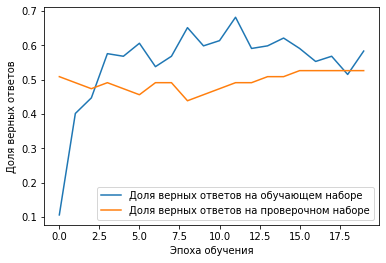

In [ ]:
#Создаём полносвязную сеть
model01 = Sequential()
#Входной полносвязный слой
model01.add(Dense(100, input_dim=maxWordsCount, activation="relu"))
#Слой регуляризации Dropout
model01.add(Dropout(0.5))
#Второй полносвязный слой
model01.add(Dense(100, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.5))
#Третий полносвязный слой
model01.add(Dense(100, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.5))
#Выходной полносвязный слой
model01.add(Dense(nClasses, activation='softmax'))


model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке
history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=128,
                    validation_data=(xVal, yVal))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

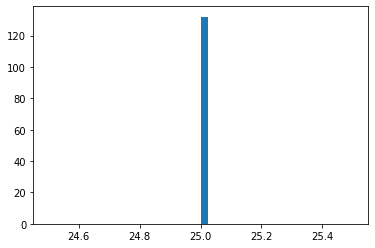

In [ ]:
lenXTrainE = [len(x) for x in xTrainE]
plt.hist(lenXTrainE, 40)
plt.show()

Epoch 1/170
5/5 [==============================] - 1s 137ms/step - loss: 1.4368 - accuracy: 0.3485 - val_loss: 1.4041 - val_accuracy: 0.4035
Epoch 2/170
5/5 [==============================] - 1s 110ms/step - loss: 1.3456 - accuracy: 0.3864 - val_loss: 1.4040 - val_accuracy: 0.4561
Epoch 3/170
5/5 [==============================] - 1s 109ms/step - loss: 1.2259 - accuracy: 0.4848 - val_loss: 1.3908 - val_accuracy: 0.5088
Epoch 4/170
5/5 [==============================] - 1s 111ms/step - loss: 1.1951 - accuracy: 0.5455 - val_loss: 1.3703 - val_accuracy: 0.4912
Epoch 5/170
5/5 [==============================] - 1s 111ms/step - loss: 1.0895 - accuracy: 0.5303 - val_loss: 1.3547 - val_accuracy: 0.5088
Epoch 6/170
5/5 [==============================] - 1s 111ms/step - loss: 1.0397 - accuracy: 0.6515 - val_loss: 1.3432 - val_accuracy: 0.5263
Epoch 7/170
5/5 [==============================] - 1s 108ms/step - loss: 1.0381 - accuracy: 0.5682 - val_loss: 1.3359 - val_accuracy: 0.5614
Epoch 8/170
5

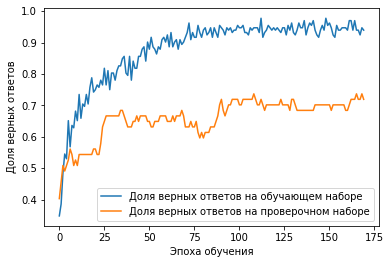

In [ ]:
maxlen = 25

xTrainE = pad_sequences(xTrainE, maxlen=maxlen)
xValE = pad_sequences(xValE, maxlen=maxlen)

#Создаём полносвязную сеть
modelE = Sequential()
#Cлой представления всего словаря слов в векторном представлении
modelE.add(Embedding(maxWordsCount, 200, input_length=maxlen))
#Слой регуляризации Dropout
modelE.add(SpatialDropout1D(0.5))
#Cлой преобразования двумерных данных в одномерные
modelE.add(Flatten())
#Слой пакетной нормализации
modelE.add(BatchNormalization())
modelE.add(Dropout(0.5))
#Полносвязный слой
modelE.add(Dense(64, activation="linear"))
#Слой регуляризации Dropout
modelE.add(Dropout(0.5))
#Полносвязный слой
#Слой пакетной нормализации
modelE.add(BatchNormalization())
#Выходной полносвязный слой
modelE.add(Dense(nClasses, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть 
history = modelE.fit(xTrainE, 
                    yTrainE, 
                    epochs=170,
                    batch_size=32,
                    validation_data=(xValE, yValE))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
last_val_accuracy = history.history['val_accuracy'][-1]

In [ ]:
print("Точность классификации данных на проверочной выборке:", round(last_val_accuracy*100, 2), "%")

Точность классификации данных на проверочной выборке: 71.93 %


**Итог:** точность классификации собеседника по сообщению в небольшом групповом чате (3 человека) составила **72 %**, что по условию задачи является неплохой точностью. 